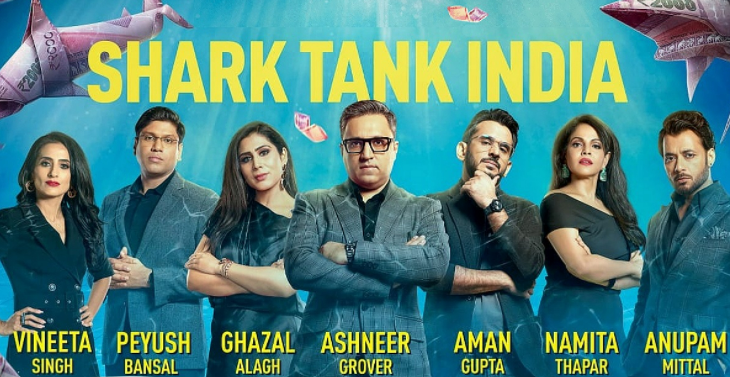

In [15]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

<a id="intro"></a> <br>
# 1. Introduction


Shark Tank India - Season 1 information. One season of SHARK TANK INDIA was broadcasted in SonyLiv OTT. Here is the EDA analysis of shark Tank Dataset.

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
data=pd.read_csv("Shark Tank India.csv")


In [18]:
data.head()

Season Number      Startup Name  Episode Number  Pitch Number Season Start  \
0              1     BluePineFoods               1             1    20-Dec-21   
1              1      BoozScooters               1             2    20-Dec-21   
2              1  HeartUpMySleeves               1             3    20-Dec-21   
3              1         TagzFoods               2             4    20-Dec-21   
4              1      HeadAndHeart               2             5    20-Dec-21   

  Season End Original Air Date                Episode Title           Anchor  \
0   4-Feb-22         20-Dec-21  Badlegi Business Ki Tasveer  Rannvijay Singh   
1   4-Feb-22         20-Dec-21  Badlegi Business Ki Tasveer  Rannvijay Singh   
2   4-Feb-22         20-Dec-21  Badlegi Business Ki Tasveer  Rannvijay Singh   
3   4-Feb-22         21-Dec-21      Insaan, Ideas Aur Sapne  Rannvijay Singh   
4   4-Feb-22         21-Dec-21      Insaan, Ideas Aur Sapne  Rannvijay Singh   

                       Industry  ... Invested Guest Name All Guest Names  \
0                          Food  ...                 NaN             NaN   
1  Vehicles/Electrical Vehicles  ...                 NaN             NaN   
2                Beauty/Fashion  ...                 NaN             NaN   
3                          Food  ...                 NaN             NaN   
4                     Education  ...                 NaN             NaN   

   Namita Present  Vineeta Present  Anupam Present  Aman Present  \
0             1.0              1.0             1.0           1.0   
1             1.0              1.0             1.0           1.0   
2             1.0              1.0             1.0           1.0   
3             1.0              1.0             1.0           1.0   
4             1.0              1.0             1.0           1.0   

   Peyush Present  Amit Present Ashneer Present Guest Present  
0             NaN           NaN             1.0           NaN  
1             NaN           NaN             1.0           NaN  
2             NaN           NaN             1.0           NaN  
3             NaN           NaN             1.0           NaN  
4             NaN           NaN             1.0           NaN  

[5 rows x 78 columns]

In [19]:
data.head().T

0             1                 2          3  \
Season Number                1             1                 1          1   
Startup Name     BluePineFoods  BoozScooters  HeartUpMySleeves  TagzFoods   
Episode Number               1             1                 1          2   
Pitch Number                 1             2                 3          4   
Season Start         20-Dec-21     20-Dec-21         20-Dec-21  20-Dec-21   
...                        ...           ...               ...        ...   
Aman Present               1.0           1.0               1.0        1.0   
Peyush Present             NaN           NaN               NaN        NaN   
Amit Present               NaN           NaN               NaN        NaN   
Ashneer Present            1.0           1.0               1.0        1.0   
Guest Present              NaN           NaN               NaN        NaN   

                            4  
Season Number               1  
Startup Name     HeadAndHeart  
Episode Number              2  
Pitch Number                5  
Season Start        20-Dec-21  
...                       ...  
Aman Present              1.0  
Peyush Present            NaN  
Amit Present              NaN  
Ashneer Present           1.0  
Guest Present             NaN  

[78 rows x 5 columns]

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441 entries, 0 to 440
Data columns (total 78 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Season Number              441 non-null    int64  
 1   Startup Name               441 non-null    object 
 2   Episode Number             441 non-null    int64  
 3   Pitch Number               441 non-null    int64  
 4   Season Start               441 non-null    object 
 5   Season End                 321 non-null    object 
 6   Original Air Date          410 non-null    object 
 7   Episode Title              441 non-null    object 
 8   Anchor                     441 non-null    object 
 9   Industry                   441 non-null    object 
 10  Business Description       441 non-null    object 
 11  Company Website            430 non-null    object 
 12  Started in                 321 non-null    float64
 13  Number of Presenters       441 non-null    int64  

In [24]:
data['Male Presenters'] = data['Male Presenters'].astype(pd.Int32Dtype())
data['Female Presenters'] = data['Female Presenters'].astype(pd.Int32Dtype())
data['Started in'] =data['Started in'].astype(pd.Int32Dtype())
data['Yearly Revenue'] = data['Yearly Revenue'].astype(pd.Int32Dtype())

# Assuming 'data' is your DataFrame
data['Monthly Sales'] = data['Monthly Sales'].fillna(0)  # Replace missing values with 0
data['Monthly Sales'] = data['Monthly Sales'].astype(int)  # Convert float to int
data['Monthly Sales'] = data['Monthly Sales'].astype(pd.Int64Dtype())  # Convert to nullable integer type


In [25]:
data.describe().T

count         mean          std       min     25%  \
Season Number              441.0     1.927438     0.782882       1.0     1.0   
Episode Number             441.0     21.21542    13.919291       0.0     9.0   
Pitch Number               441.0        221.0    127.44999       1.0   111.0   
Started in                 321.0  2018.791277     2.814591    1998.0  2018.0   
Number of Presenters       441.0     2.029478     0.829316       1.0     1.0   
Male Presenters            381.0     1.695538     0.831426       1.0     1.0   
Female Presenters          206.0     1.194175     0.420412       1.0     1.0   
Transgender Presenters       3.0          1.0          0.0       1.0     1.0   
Couple Presenters          437.0     0.180778     0.385275       0.0     0.0   
Yearly Revenue             210.0   596.214286  1601.166969       0.0    75.0   
Monthly Sales              441.0    33.861678   182.140671       0.0     0.0   
Gross Margin               117.0    54.547009    21.149099       3.0    40.0   
Net Margin                  64.0     21.21875    12.547647       1.0   10.75   
EBITDA                      16.0     11.53125    12.898926     -20.0     5.0   
SKUs                        27.0   342.185185  1157.611169       1.0     9.0   
Original Ask Amount        441.0   148.969872  1426.542757       0.0    50.0   
Original Offered Equity    441.0     3.789796     3.693267       0.2     1.0   
Valuation Requested        441.0  5357.185214  9191.269411       0.0  1000.0   
Received Offer             441.0      0.68254     0.466017       0.0     0.0   
Accepted Offer             301.0      0.82392     0.381522       0.0     1.0   
Total Deal Amount          248.0    66.083119    43.601659       0.0    40.0   
Total Deal Equity          248.0     8.531532     9.637837       0.5     2.5   
Total Deal Debt             53.0    46.622642    27.182592      20.0    25.0   
Debt Interest               37.0    10.432432     3.586553       0.0    10.0   
Deal Valuation             247.0  2299.296411  3535.721814       0.0   434.5   
Number of Sharks in Deal   248.0     2.004032     1.143537       1.0     1.0   
Royalty Deal                14.0          1.0          0.0       1.0     1.0   
Advisory Shares Equity       3.0     1.533333     0.950438       0.6    1.05   
Namita Investment Amount    81.0    32.911608    20.897607  0.000016    20.0   
Namita Investment Equity    81.0     4.005909     5.161855       0.2     1.0   
Namita Debt Amount          14.0    41.082857    21.412774      12.5   26.25   
Vineeta Investment Amount   63.0    31.504167    21.360443    0.0025   17.58   
Vineeta Investment Equity   63.0     4.292286     4.844934       0.2     1.0   
Vineeta Debt Amount         11.0    24.923636    14.011572      12.5   13.75   
Anupam Investment Amount    70.0    29.659325    21.892187       0.0    17.5   
Anupam Investment Equity    70.0     4.816257      5.38523     0.166  1.0375   
Anupam Debt Amount           7.0    27.142857    16.100503      12.5   16.25   
Aman Investment Amount     101.0    34.612599    24.824278       0.0    17.5   
Aman Investment Equity     101.0     3.206758     4.518018     0.166     1.0   
Aman Debt Amount            14.0    39.665714    18.308146     16.66   26.25   
Peyush Investment Amount    87.0    34.602101    30.408193       0.0    20.0   
Peyush Investment Equity    87.0     5.683115    10.959026     0.166     1.0   
Peyush Debt Amount          11.0    31.090909    15.332675      10.0    23.5   
Amit Investment Amount      33.0    36.193939    27.073697       3.5    15.0   
Amit Investment Equity      33.0      4.49717     4.775754      0.33     1.5   
Amit Debt Amount             6.0         37.5    18.641352      10.0   28.75   
Ashneer Investment Amount   21.0    25.682381     16.86062       1.0    15.0   
Ashneer Investment Equity   21.0         4.44     5.065662       1.0     2.0   
Ashneer Debt Amount          2.0         57.0     59.39697      15.0    36.0   
Guest Investment Amount    

<a id="Basic"></a> <br>
# 2. Basic Information

In [26]:
#basic Information 
print("Season:", data['Season Number'].max())
print("Episodes:", data['Episode Number'].max())
print("Number of startups pitched idea: ", data['Pitch Number'].max())
print("Number of pitch in each episode:", data['Episode Number'].value_counts().unique())

Season: 3
Episodes: 51
Number of startups pitched idea:  441
Number of pitch in each episode: [31 11 10  9  8  7  6  4  3  2]


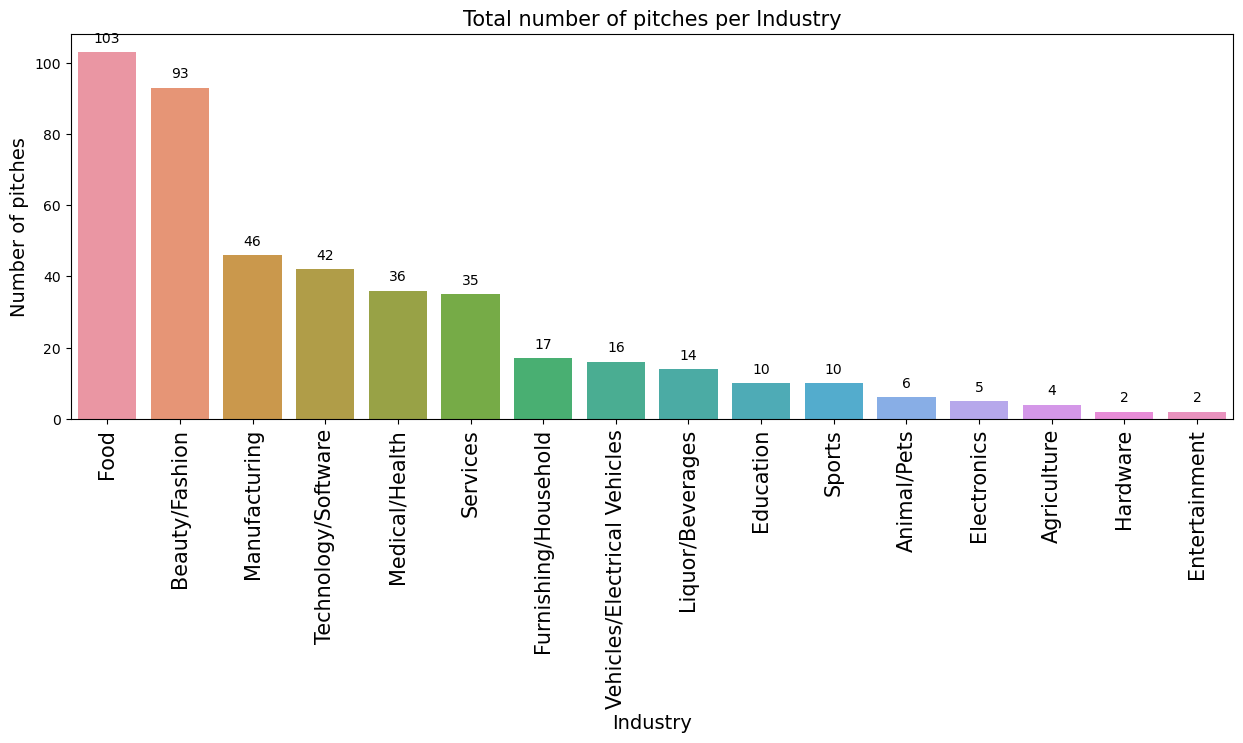

In [28]:
#Types of Pitches from different industries and number of pitches belong to each industry
# Assuming 'industries' is your pandas Series with industry counts
plt.figure(figsize=(15, 5))
ax = sns.barplot(x=industries.index, y=industries)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')
plt.xticks(rotation=90, fontsize=15)
plt.xlabel("Industry", fontsize=14)
plt.ylabel("Number of pitches", fontsize=14)
plt.title("Total number of pitches per Industry", fontsize=15)
plt.show()


<a id="DIversity"></a> <br>
# 3. Diversity Analysis

In [29]:
#presenter Diversity 
print("Number of Presenters    :",data['Number of Presenters'].sum())
print("Total female presenters :",data["Female Presenters"].sum())
print("Total male presenters   :",data["Male Presenters"].sum())
print("Couple presenters       :",len(data.loc[data["Couple Presenters"]==1]))


Number of Presenters    : 895
Total female presenters : 246
Total male presenters   : 646
Couple presenters       : 79


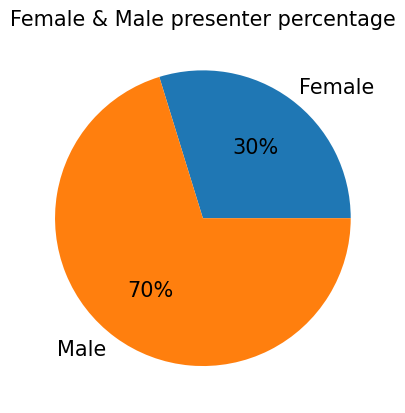

In [30]:
#presenter_g=[int(data["Female Presenters"].sum()),int(data['Male Presenters'].sum())]
presenter_g=[75,177]
labels=['Female','Male']
colors = sns.color_palette('pastel')[0:2]
plt.pie(presenter_g, labels = labels, autopct='%.0f%%',textprops={'fontsize': 15})
plt.title("Female & Male presenter percentage",fontsize=15)
plt.show()

<a id="offer"></a> <br>
# 4. Offer Analysis

In [31]:
#offer accepted
offers=round(data['Received Offer'].value_counts(normalize=True)*100,2)

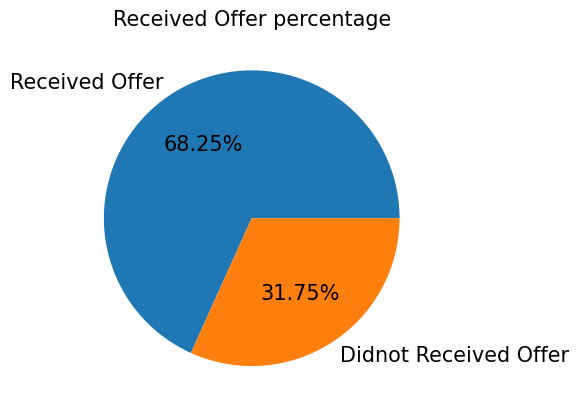

In [32]:
rec_offer=[offers[1],offers[0]]
labels=['Received Offer','Didnot Received Offer']
colors = sns.color_palette('pastel')[0:2]
plt.pie(rec_offer, labels = labels, autopct='%.2f%%',textprops={'fontsize': 15})
plt.title("Received Offer percentage",fontsize=15)
plt.show()

In [33]:
#accepted offer 
accept_offers=round(data['Accepted Offer'].value_counts(normalize=True)*100,2)


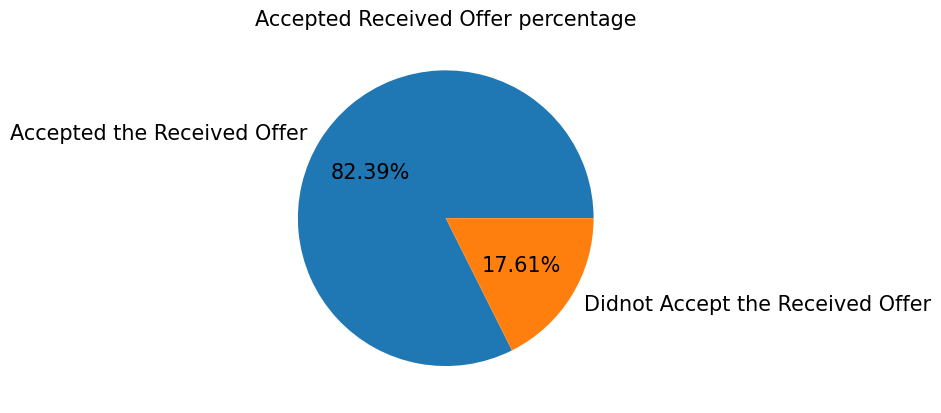

In [34]:
presenter_g=[accept_offers[1],accept_offers[0]]
labels=['Accepted the Received Offer','Didnot Accept the Received Offer']
colors = sns.color_palette('pastel')[0:2]
plt.pie(presenter_g, labels = labels, autopct='%.2f%%',textprops={'fontsize': 15})
plt.title("Accepted Received Offer percentage",fontsize=15)
plt.show()

In [36]:
# Startup that rejected the offers 
# Startup that rejected the offers
rejected_offers = data.loc[data['Accepted Offer'] == 0, ["Startup Name", "Industry", "Original Ask Amount"]]
print(rejected_offers)


           Startup Name                      Industry  Original Ask Amount
6            qZenseLabs                          Food                100.0
19             Torch-it                     Education                 75.0
21          LaKheerDeli                          Food                 50.0
27        KabiraHandmad                          Food                100.0
41     MorrikoPureFoods                          Food                100.0
55       IndiaHempandCo                          Food                 50.0
60            KetoIndia                          Food                150.0
70            Moonshine                          Food                 80.0
71              Falhari                          Food                 50.0
73          UrbanMonkey                Beauty/Fashion                100.0
74        GuardianGears                 Manufacturing                 30.0
81               Alpino                          Food                150.0
87   AlisteTechnologies  

In [37]:
#rejected offers from different industries

decline=data.loc[data['Accepted Offer']==0, ["Industry"]]
decline_offer=round(decline.value_counts(normalize=True)*100,2)
decline_offer

Industry                    
Food                            32.08
Beauty/Fashion                  24.53
Technology/Software              9.43
Furnishing/Household             7.55
Manufacturing                    7.55
Medical/Health                   5.66
Services                         5.66
Animal/Pets                      1.89
Education                        1.89
Liquor/Beverages                 1.89
Vehicles/Electrical Vehicles     1.89
dtype: float64

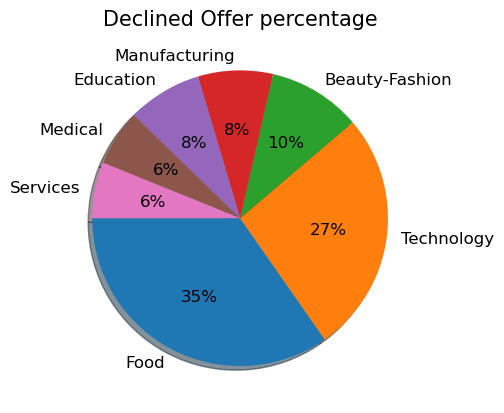

In [38]:
de_offer=[decline_offer[0],decline_offer[1],decline_offer[2],decline_offer[3],decline_offer[4],decline_offer[5],decline_offer[6]]
labels=['Food','Technology','Beauty-Fashion', 'Manufacturing', 'Education', 'Medical','Services']
colors = sns.color_palette('pastel')[0:7]
plt.pie(de_offer,explode=None, labels = labels, autopct='%.0f%%',textprops={'fontsize': 12}, shadow=True, startangle=180)

plt.title("Declined Offer percentage",fontsize=15)

plt.show()


<a id="comparison"></a> <br>
# 5. Number of investment, Investment amount, equity, debt amount comparison.

In [40]:
 #the number of investments done by individual shark
Ashneer_amount=data.loc[(data["Ashneer Investment Amount"].isnull()==False)&(data["Ashneer Investment Amount"]!=0)]
Namita_amount=data.loc[(data["Namita Investment Amount"].isnull()==False)&(data["Namita Investment Amount"]!=0)]
Anupam_amount=data.loc[(data["Anupam Investment Amount"].isnull()==False)&(data["Anupam Investment Amount"]!=0)]
Vineeta_amount=data.loc[(data["Vineeta Investment Amount"].isnull()==False)&(data["Vineeta Investment Amount"]!=0)]
Aman_amount=data.loc[(data["Aman Investment Amount"].isnull()==False)&(data["Aman Investment Amount"]!=0)]
Peyush_amount=data.loc[(data["Peyush Investment Amount"].isnull()==False)&(data["Peyush Investment Amount"]!=0)]


In [41]:
print("-"*60,"\n","Ashneer invested in",len(Ashneer_amount),"number of business in the season.")
print("Namita invested in",len(Namita_amount),"number of business in the season.")
print("Anupam invested in",len(Anupam_amount),"number of business in the season.")
print("Vineeta invested in",len(Vineeta_amount),"number of business in the season.")
print("Aman invested in",len(Aman_amount),"number of business in the season.")
print("Peyush invested in",len(Peyush_amount),"number of business in the season.")


------------------------------------------------------------ 
 Ashneer invested in 21 number of business in the season.
Namita invested in 81 number of business in the season.
Anupam invested in 69 number of business in the season.
Vineeta invested in 63 number of business in the season.
Aman invested in 100 number of business in the season.
Peyush invested in 86 number of business in the season.


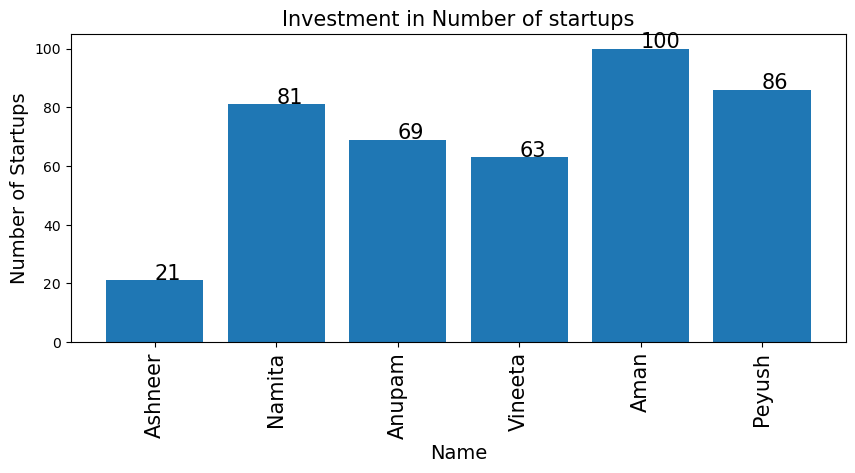

In [44]:
startup_count=[len(Ashneer_amount),len(Namita_amount),len(Anupam_amount),len(Vineeta_amount),len(Aman_amount),len(Peyush_amount)]
name=['Ashneer','Namita','Anupam','Vineeta','Aman','Peyush']
df = {'Name':name,'Startup_count':startup_count}
plt.figure(figsize=(10,4))
plt.bar(df['Name'],df['Startup_count'])
plt.xticks(rotation=90,fontsize=15)
plt.xlabel("Name",fontsize=14)
plt.ylabel("Number of Startups",fontsize=14)
for index,d in enumerate(startup_count):
    plt.text(x=index , y =d+0.2 , s=f"{d}" , fontdict=dict(fontsize=15))
#plt.tight_layout()
plt.title("Investment in Number of startups",fontsize=15)
plt.show()

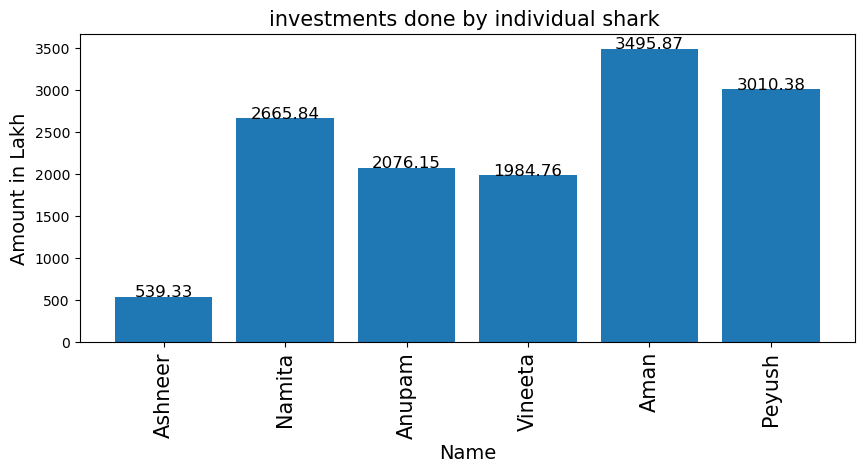

In [46]:
#the investments  amount done by individual shark
startup_count=[Ashneer_amount["Ashneer Investment Amount"].sum(),Namita_amount["Namita Investment Amount"].sum(),Anupam_amount["Anupam Investment Amount"].sum(),Vineeta_amount["Vineeta Investment Amount"].sum(),Aman_amount["Aman Investment Amount"].sum(),Peyush_amount["Peyush Investment Amount"].sum()]
name=['Ashneer','Namita','Anupam','Vineeta','Aman','Peyush']
df = {'Name':name,'Startup_count':startup_count}
plt.figure(figsize=(10,4))
plt.bar(df['Name'],df['Startup_count'])
plt.xticks(rotation=90,fontsize=15)
plt.xlabel("Name",fontsize=14)
plt.ylabel("Amount in Lakh",fontsize=14)
for index,d in enumerate(startup_count):
    plt.text(x=index , y =d+1 , s=f"{round(d,2)}" ,ha = 'center', fontdict=dict(fontsize=12))
#plt.tight_layout()
plt.title("investments done by individual shark ",fontsize=15)
plt.show()

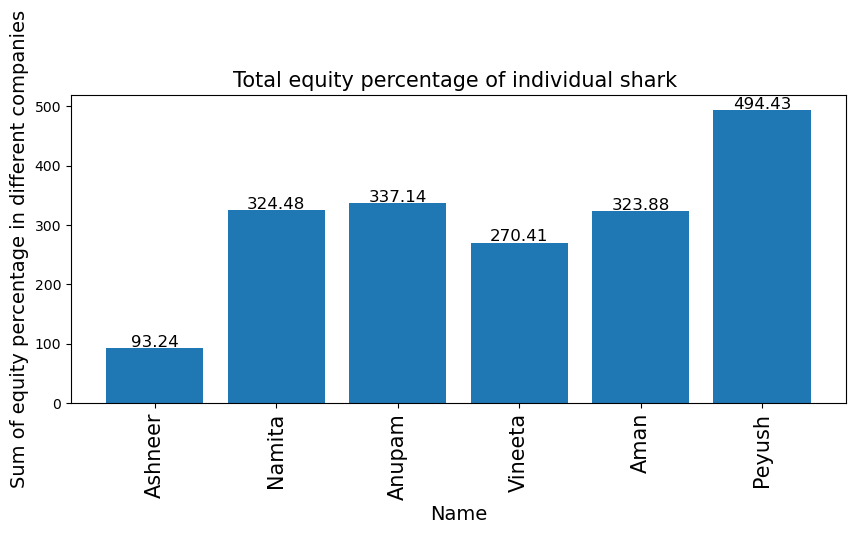

In [47]:
#equity %
equity=[data['Ashneer Investment Equity'].sum(), data['Namita Investment Equity'].sum(), data['Anupam Investment Equity'].sum(), data['Vineeta Investment Equity'].sum(),
    data['Aman Investment Equity'].sum(), data['Peyush Investment Equity'].sum()]
name=['Ashneer','Namita','Anupam','Vineeta','Aman','Peyush']
df = {'Name':name,'Total equity':equity }
plt.figure(figsize=(10,4))
plt.bar(df['Name'],df['Total equity'])
plt.xticks(rotation=90,fontsize=15)
plt.xlabel("Name",fontsize=14)
plt.ylabel("Sum of equity percentage in different companies",fontsize=14)
for index,d in enumerate(equity):
    plt.text(x=index , y =d+2 , s=f"{round(d,2)}" ,ha = 'center', fontdict=dict(fontsize=12))
#plt.tight_layout()
plt.title("Total equity percentage of individual shark ",fontsize=15)
plt.show()

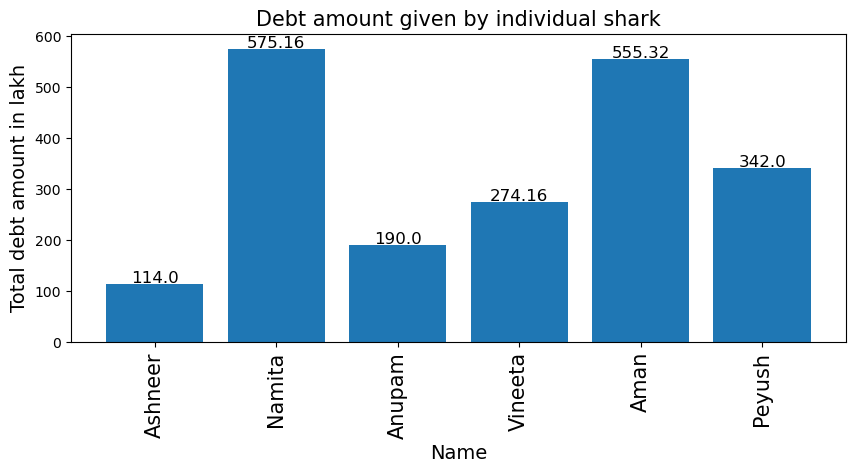

In [48]:
#investment based on the  Debt and loaned Amount
debt=[data['Ashneer Debt Amount'].sum(), data['Namita Debt Amount'].sum(), data['Anupam Debt Amount'].sum(), data['Vineeta Debt Amount'].sum(),
    data['Aman Debt Amount'].sum(), data['Peyush Debt Amount'].sum()]
name=['Ashneer','Namita','Anupam','Vineeta','Aman','Peyush']
df = {'Name':name,'Total debt':debt }
plt.figure(figsize=(10,4))
plt.bar(df['Name'],df['Total debt'])
plt.xticks(rotation=90,fontsize=15)
plt.xlabel("Name",fontsize=14)
plt.ylabel("Total debt amount in lakh",fontsize=14)
for index,d in enumerate(debt):
    plt.text(x=index , y =d+2 , s=f"{round(d,2)}" ,ha = 'center', fontdict=dict(fontsize=12))
#plt.tight_layout()
plt.title("Debt amount given by individual shark",fontsize=15)
plt.show()

<a id="graph"></a> <br>
# 6. Total investment and Equity

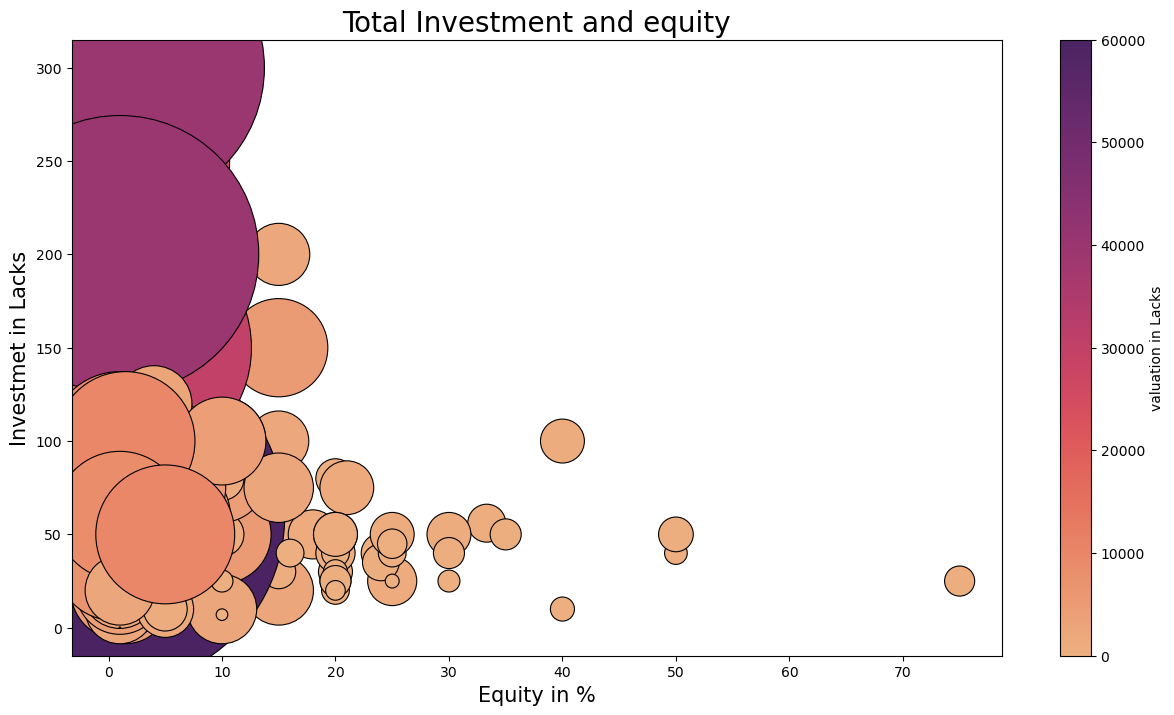

In [51]:
#startup anlaysis
DealDone=data.loc[data["Accepted Offer"]==1]

fig = plt.figure(figsize=(15,8))    

plt.subplot()
plt.scatter("Total Deal Equity", "Total Deal Amount", data=DealDone, s=DealDone["Valuation Requested"], c="Valuation Requested", cmap="flare", edgecolor="k", linewidths=0.8)


plt.title("Total Investment and equity",fontsize=20)
plt.xlabel("Equity in %",fontsize=15,color="k")
plt.ylabel("Investmet in Lacks",fontsize=15,color="k")
plt.colorbar(label="valuation in Lacks")


<a id="startup"></a> <br>
# 7. Startup Analysis 

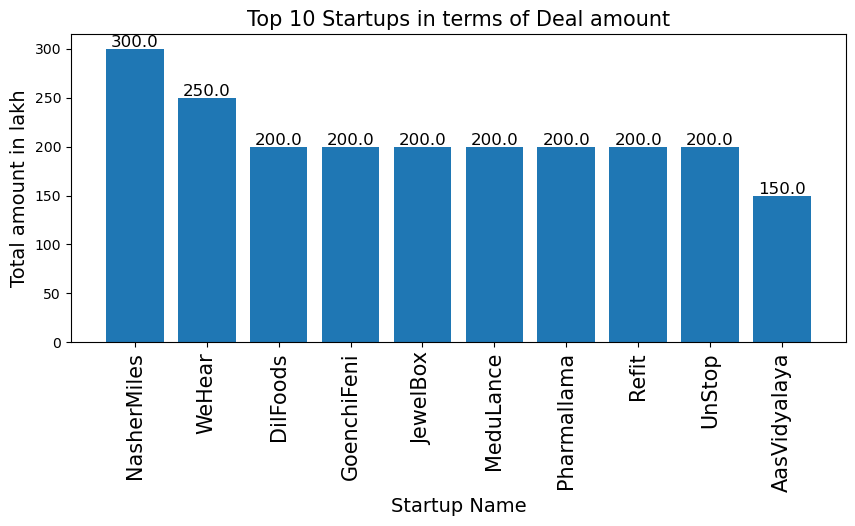

In [52]:
#startups
Amount=data.groupby("Startup Name")["Total Deal Amount"].max().nlargest(10)
plt.figure(figsize=(10,4))
plt.bar(Amount.index,Amount)
plt.xticks(rotation=90,fontsize=15)
plt.xlabel("Startup Name",fontsize=14)
plt.ylabel("Total amount in lakh",fontsize=14)
for index,d in enumerate(Amount):
    plt.text(x=index , y =d+2 , s=f"{round(d,2)}" ,ha = 'center', fontdict=dict(fontsize=12))
#plt.tight_layout()
plt.title("Top 10 Startups in terms of Deal amount",fontsize=15)
plt.show()

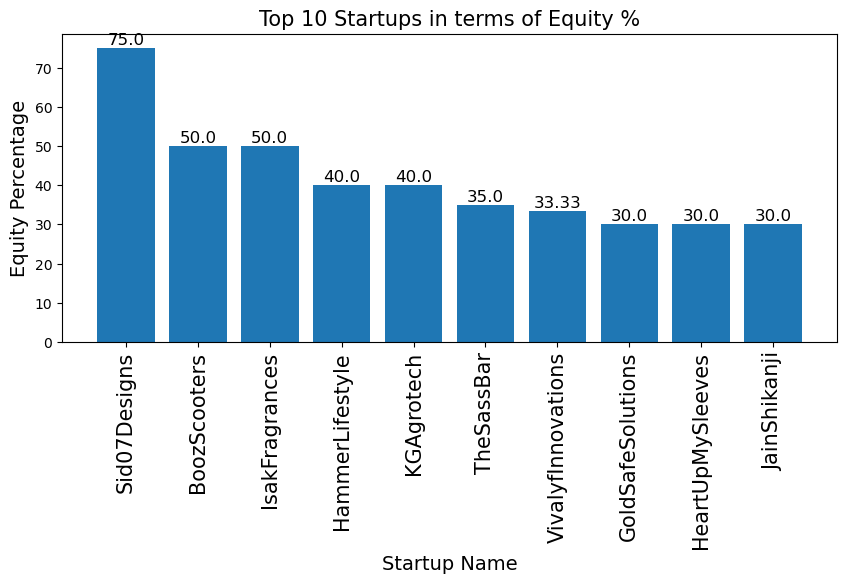

In [53]:
equity=data.groupby("Startup Name")["Total Deal Equity"].max().nlargest(10)
plt.figure(figsize=(10,4))
plt.bar(equity.index,equity)
plt.xticks(rotation=90,fontsize=15)
plt.xlabel("Startup Name",fontsize=14)
plt.ylabel("Equity Percentage",fontsize=14)
for index,d in enumerate(equity):
    plt.text(x=index , y =d+1 , s=f"{round(d,2)}" ,ha = 'center', fontdict=dict(fontsize=12))
#plt.tight_layout()
plt.title("Top 10 Startups in terms of Equity %",fontsize=15)
plt.show()

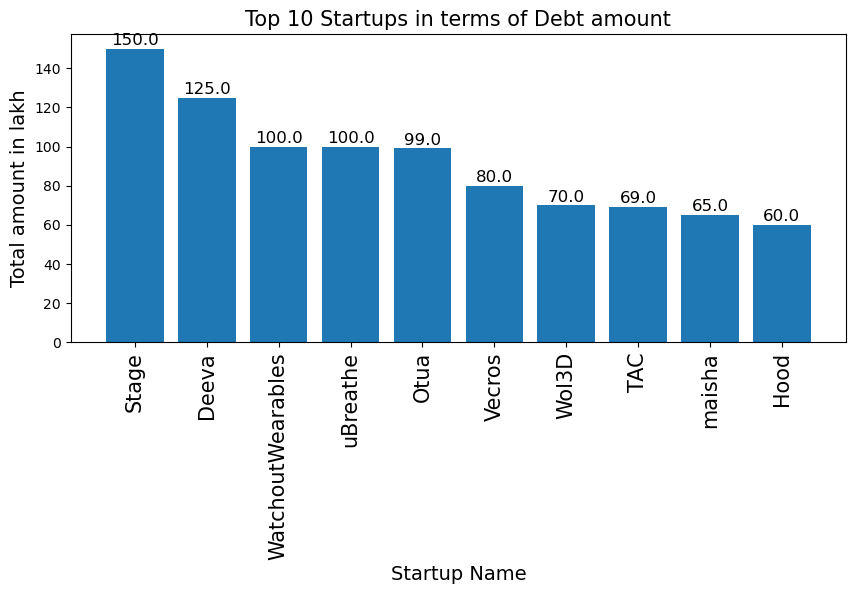

In [54]:
debt=data.groupby("Startup Name")["Total Deal Debt"].max().nlargest(10)
plt.figure(figsize=(10,4))
plt.bar(debt.index,debt)
plt.xticks(rotation=90,fontsize=15)
plt.xlabel("Startup Name",fontsize=14)
plt.ylabel("Total amount in lakh",fontsize=14)
for index,d in enumerate(debt):
    plt.text(x=index , y =d+2 , s=f"{round(d,2)}" ,ha = 'center', fontdict=dict(fontsize=12))
#plt.tight_layout()
plt.title("Top 10 Startups in terms of Debt amount",fontsize=15)
plt.show()

<a id="ashneer"></a> <br>
# 8. Ashneer's Investment Analysis

Text(0.5, 0.98, "Ashneer's Investment Analysis")

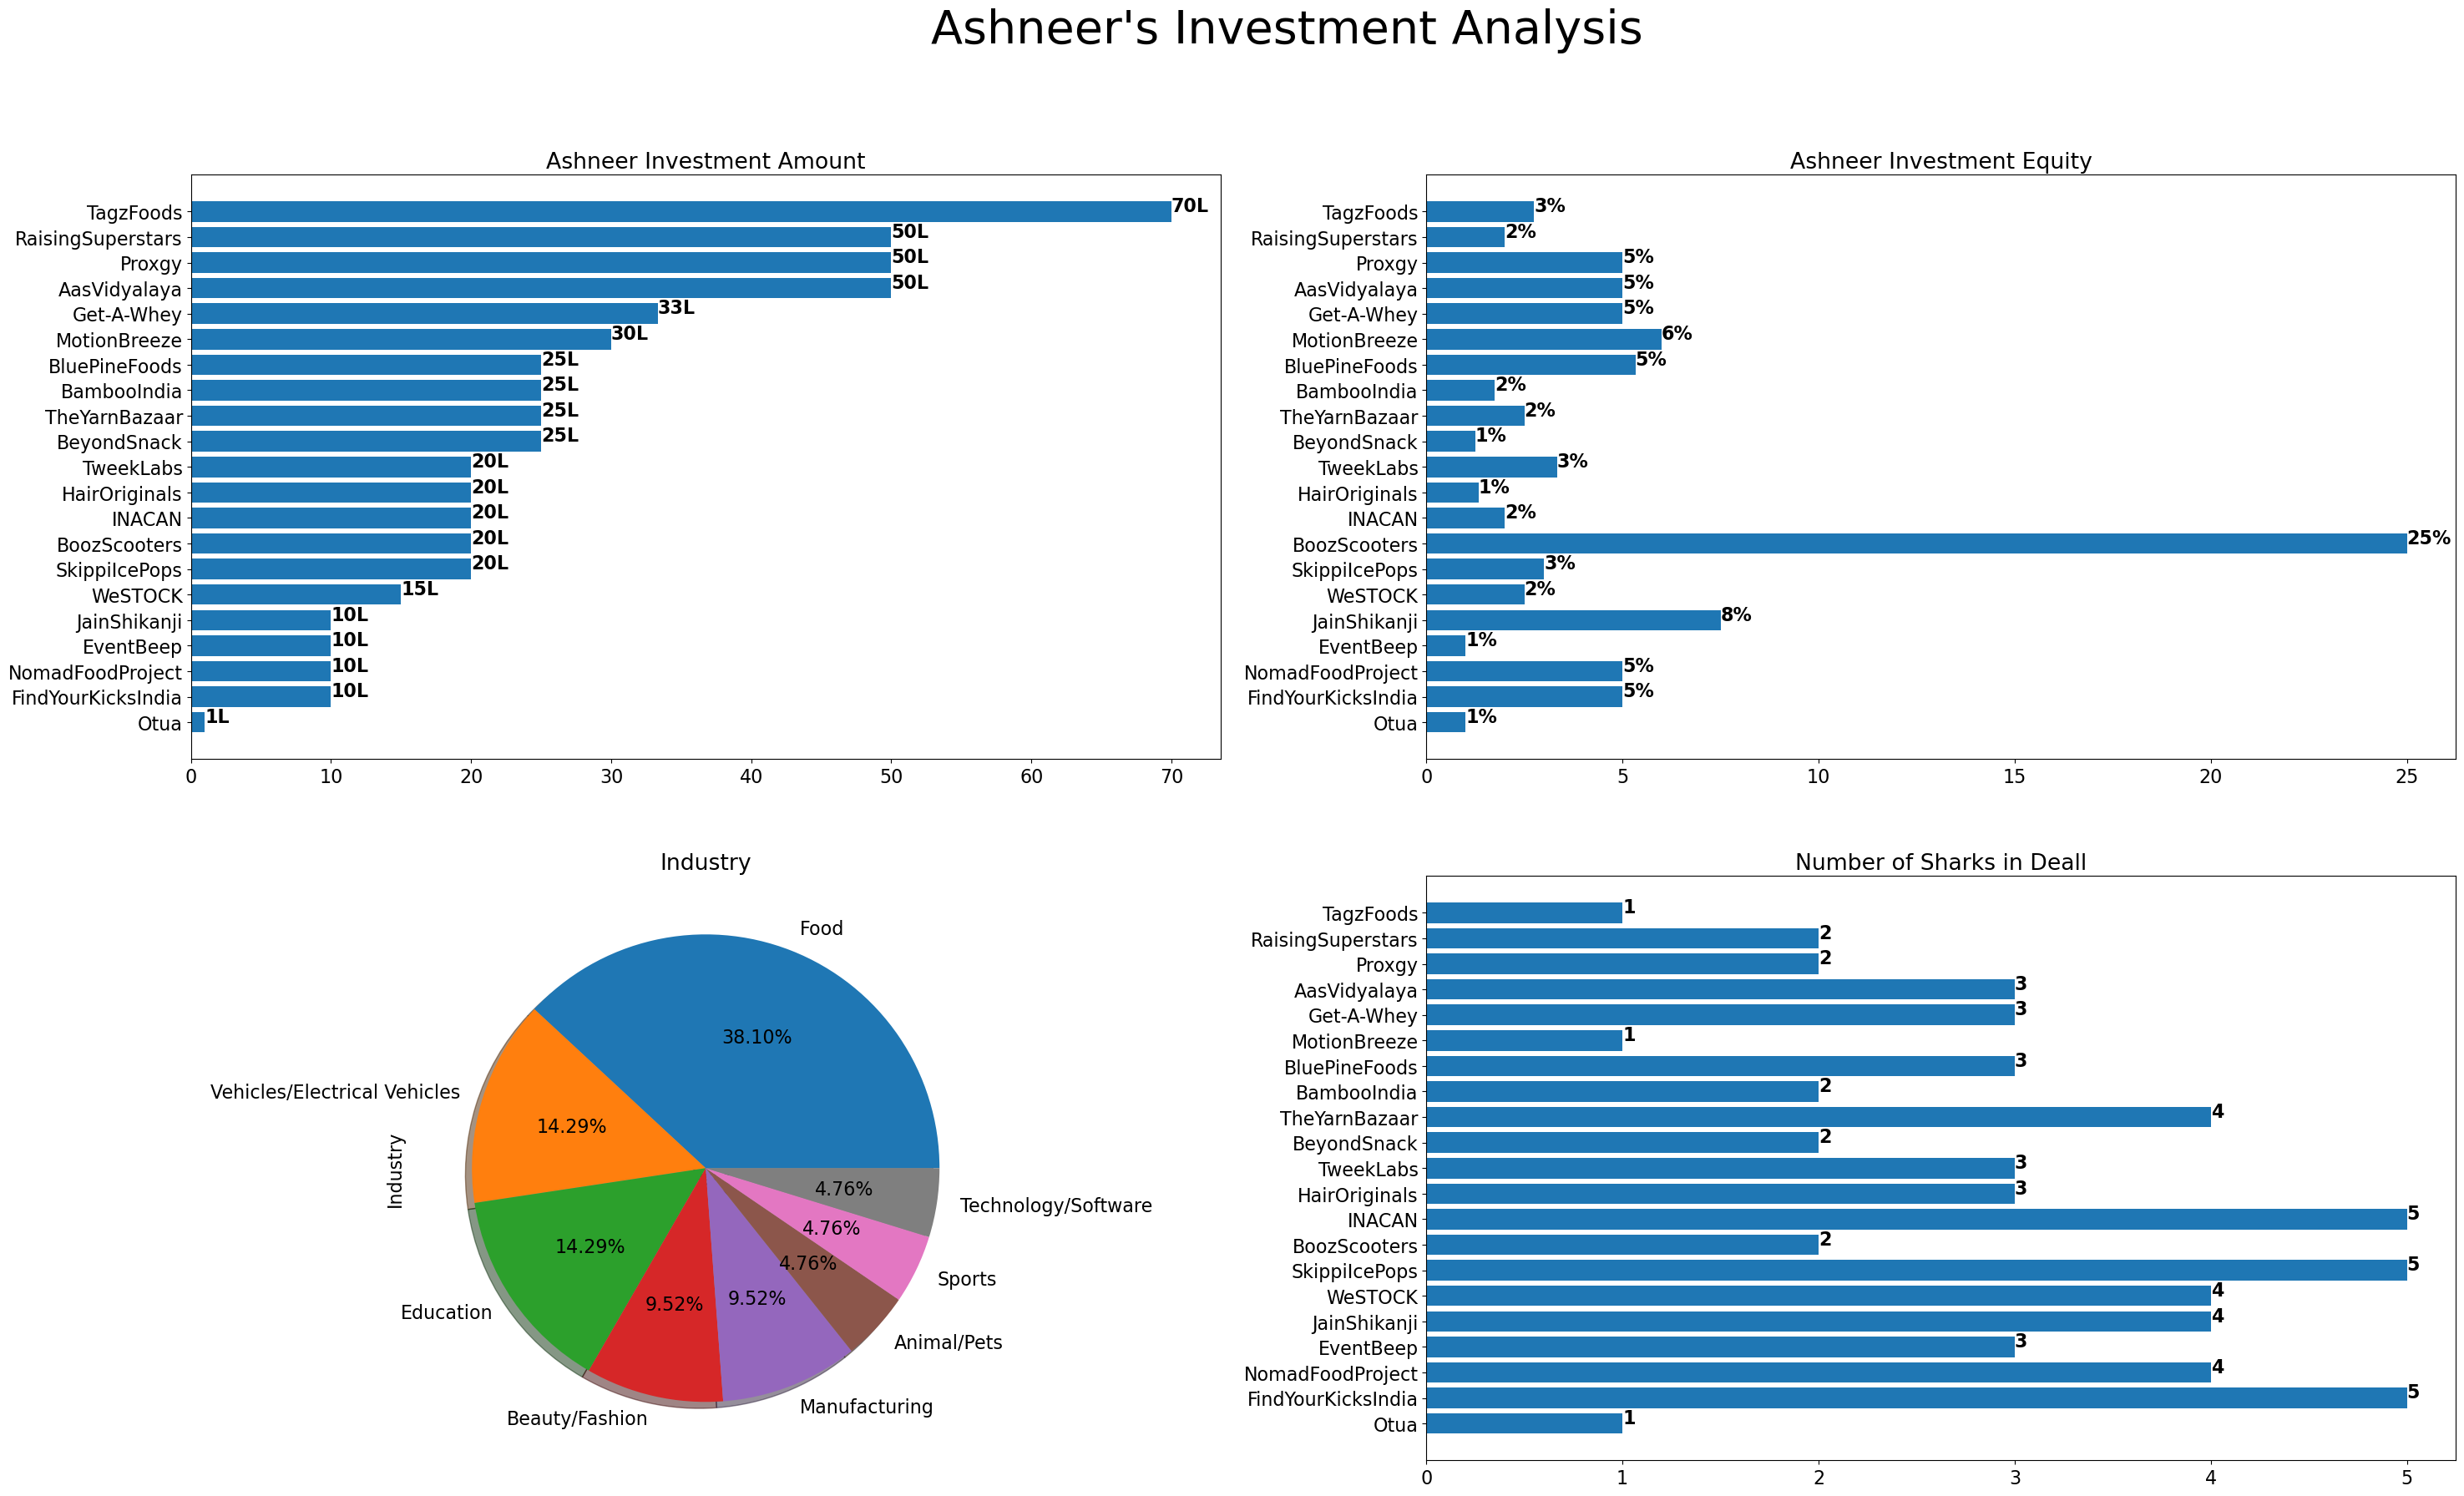

In [56]:
#Shark anlaysis
Ashneer = Ashneer_amount.sort_values('Ashneer Investment Amount')
plt.rcParams.update({'font.size': 16})

plt.figure(figsize=(35,20))
plt.subplot(2,2,1)
plt.barh(Ashneer["Startup Name"],Ashneer["Ashneer Investment Amount"])
for i, v in enumerate(Ashneer["Ashneer Investment Amount"]):
    plt.text(v, i , str(round(v))+"L", color='black', fontweight='bold')
plt.title("Ashneer Investment Amount")
plt.subplot(2,2,2)
plt.barh(Ashneer["Startup Name"],Ashneer["Ashneer Investment Equity"])
for i, v in enumerate(Ashneer["Ashneer Investment Equity"]):
    plt.text(v, i , str(round(v))+"%", color='black', fontweight='bold')
plt.title("Ashneer Investment Equity")
plt.subplot(2,2,3)
Ashneer["Industry"].value_counts().plot(kind='pie',autopct='%.2f%%',shadow=True)
plt.title("Industry")
plt.subplot(2,2,4)
plt.barh(Ashneer["Startup Name"],Ashneer["Number of Sharks in Deal"])
for i, v in enumerate(Ashneer["Number of Sharks in Deal"]):
    plt.text(v, i , str(round(v)), color='black', fontweight='bold')
plt.title("Number of Sharks in Deall")
plt.suptitle("Ashneer's Investment Analysis",fontsize=40)

<a id="namita"></a> <br>
# 9. Namita's Investment Analysis

Text(0.5, 0.98, "Namita's Investment Analysis")

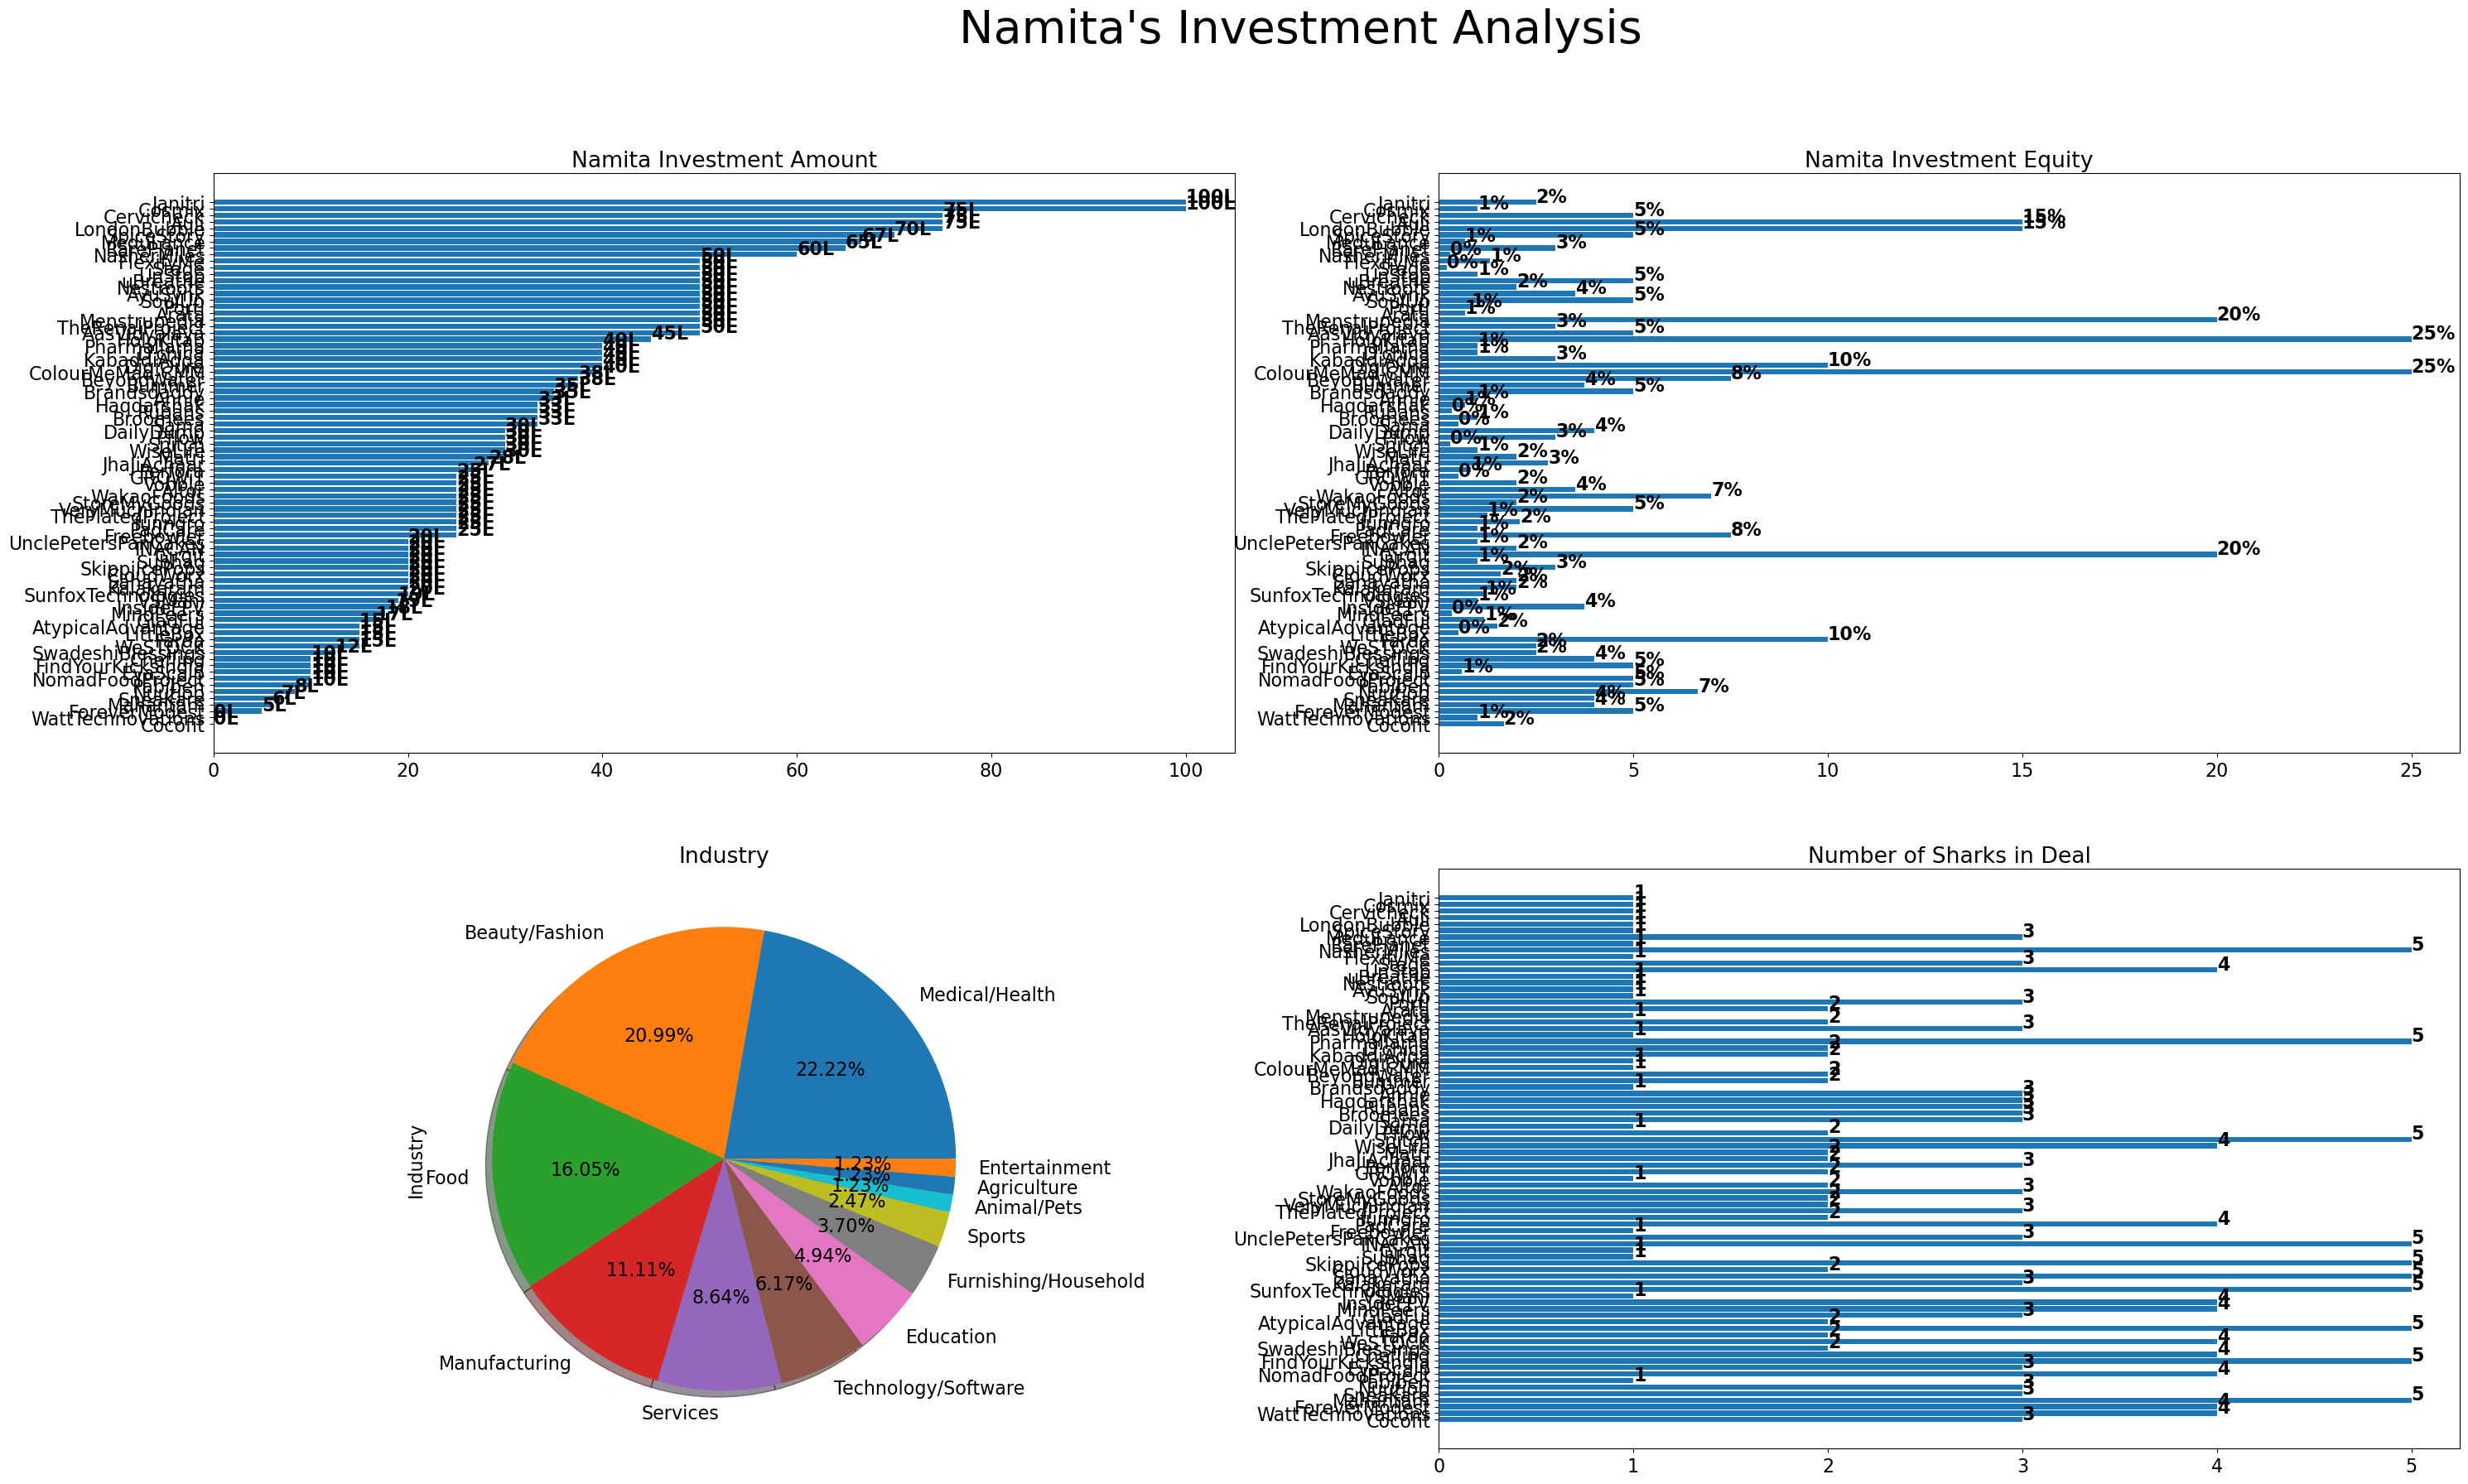

In [57]:
Namita = Namita_amount.sort_values('Namita Investment Amount')
plt.rcParams.update({'font.size': 16})

plt.figure(figsize=(35,20))
plt.subplot(2,2,1)
plt.barh(Namita["Startup Name"],Namita["Namita Investment Amount"])
for i, v in enumerate(Namita["Namita Investment Amount"]):
    plt.text(v, i , str(round(v))+"L", color='black', fontweight='bold')
plt.title("Namita Investment Amount")
plt.subplot(2,2,2)
plt.barh(Namita["Startup Name"],Namita["Namita Investment Equity"])
for i, v in enumerate(Namita["Namita Investment Equity"]):
    plt.text(v, i , str(round(v))+"%", color='black', fontweight='bold')
plt.title("Namita Investment Equity")
plt.subplot(2,2,3)
Namita["Industry"].value_counts().plot(kind='pie',autopct='%.2f%%',shadow=True)
plt.title("Industry")
plt.subplot(2,2,4)
plt.barh(Namita["Startup Name"],Namita["Number of Sharks in Deal"])
for i, v in enumerate(Namita["Number of Sharks in Deal"]):
    plt.text(v, i , str(round(v)), color='black', fontweight='bold')
plt.title("Number of Sharks in Deal")
plt.suptitle("Namita's Investment Analysis",fontsize=40)


<a id="anupam"></a> <br>
# 10. Anupam's Investment Analysis

Text(0.5, 0.98, "Anupam's Investment Analysis")

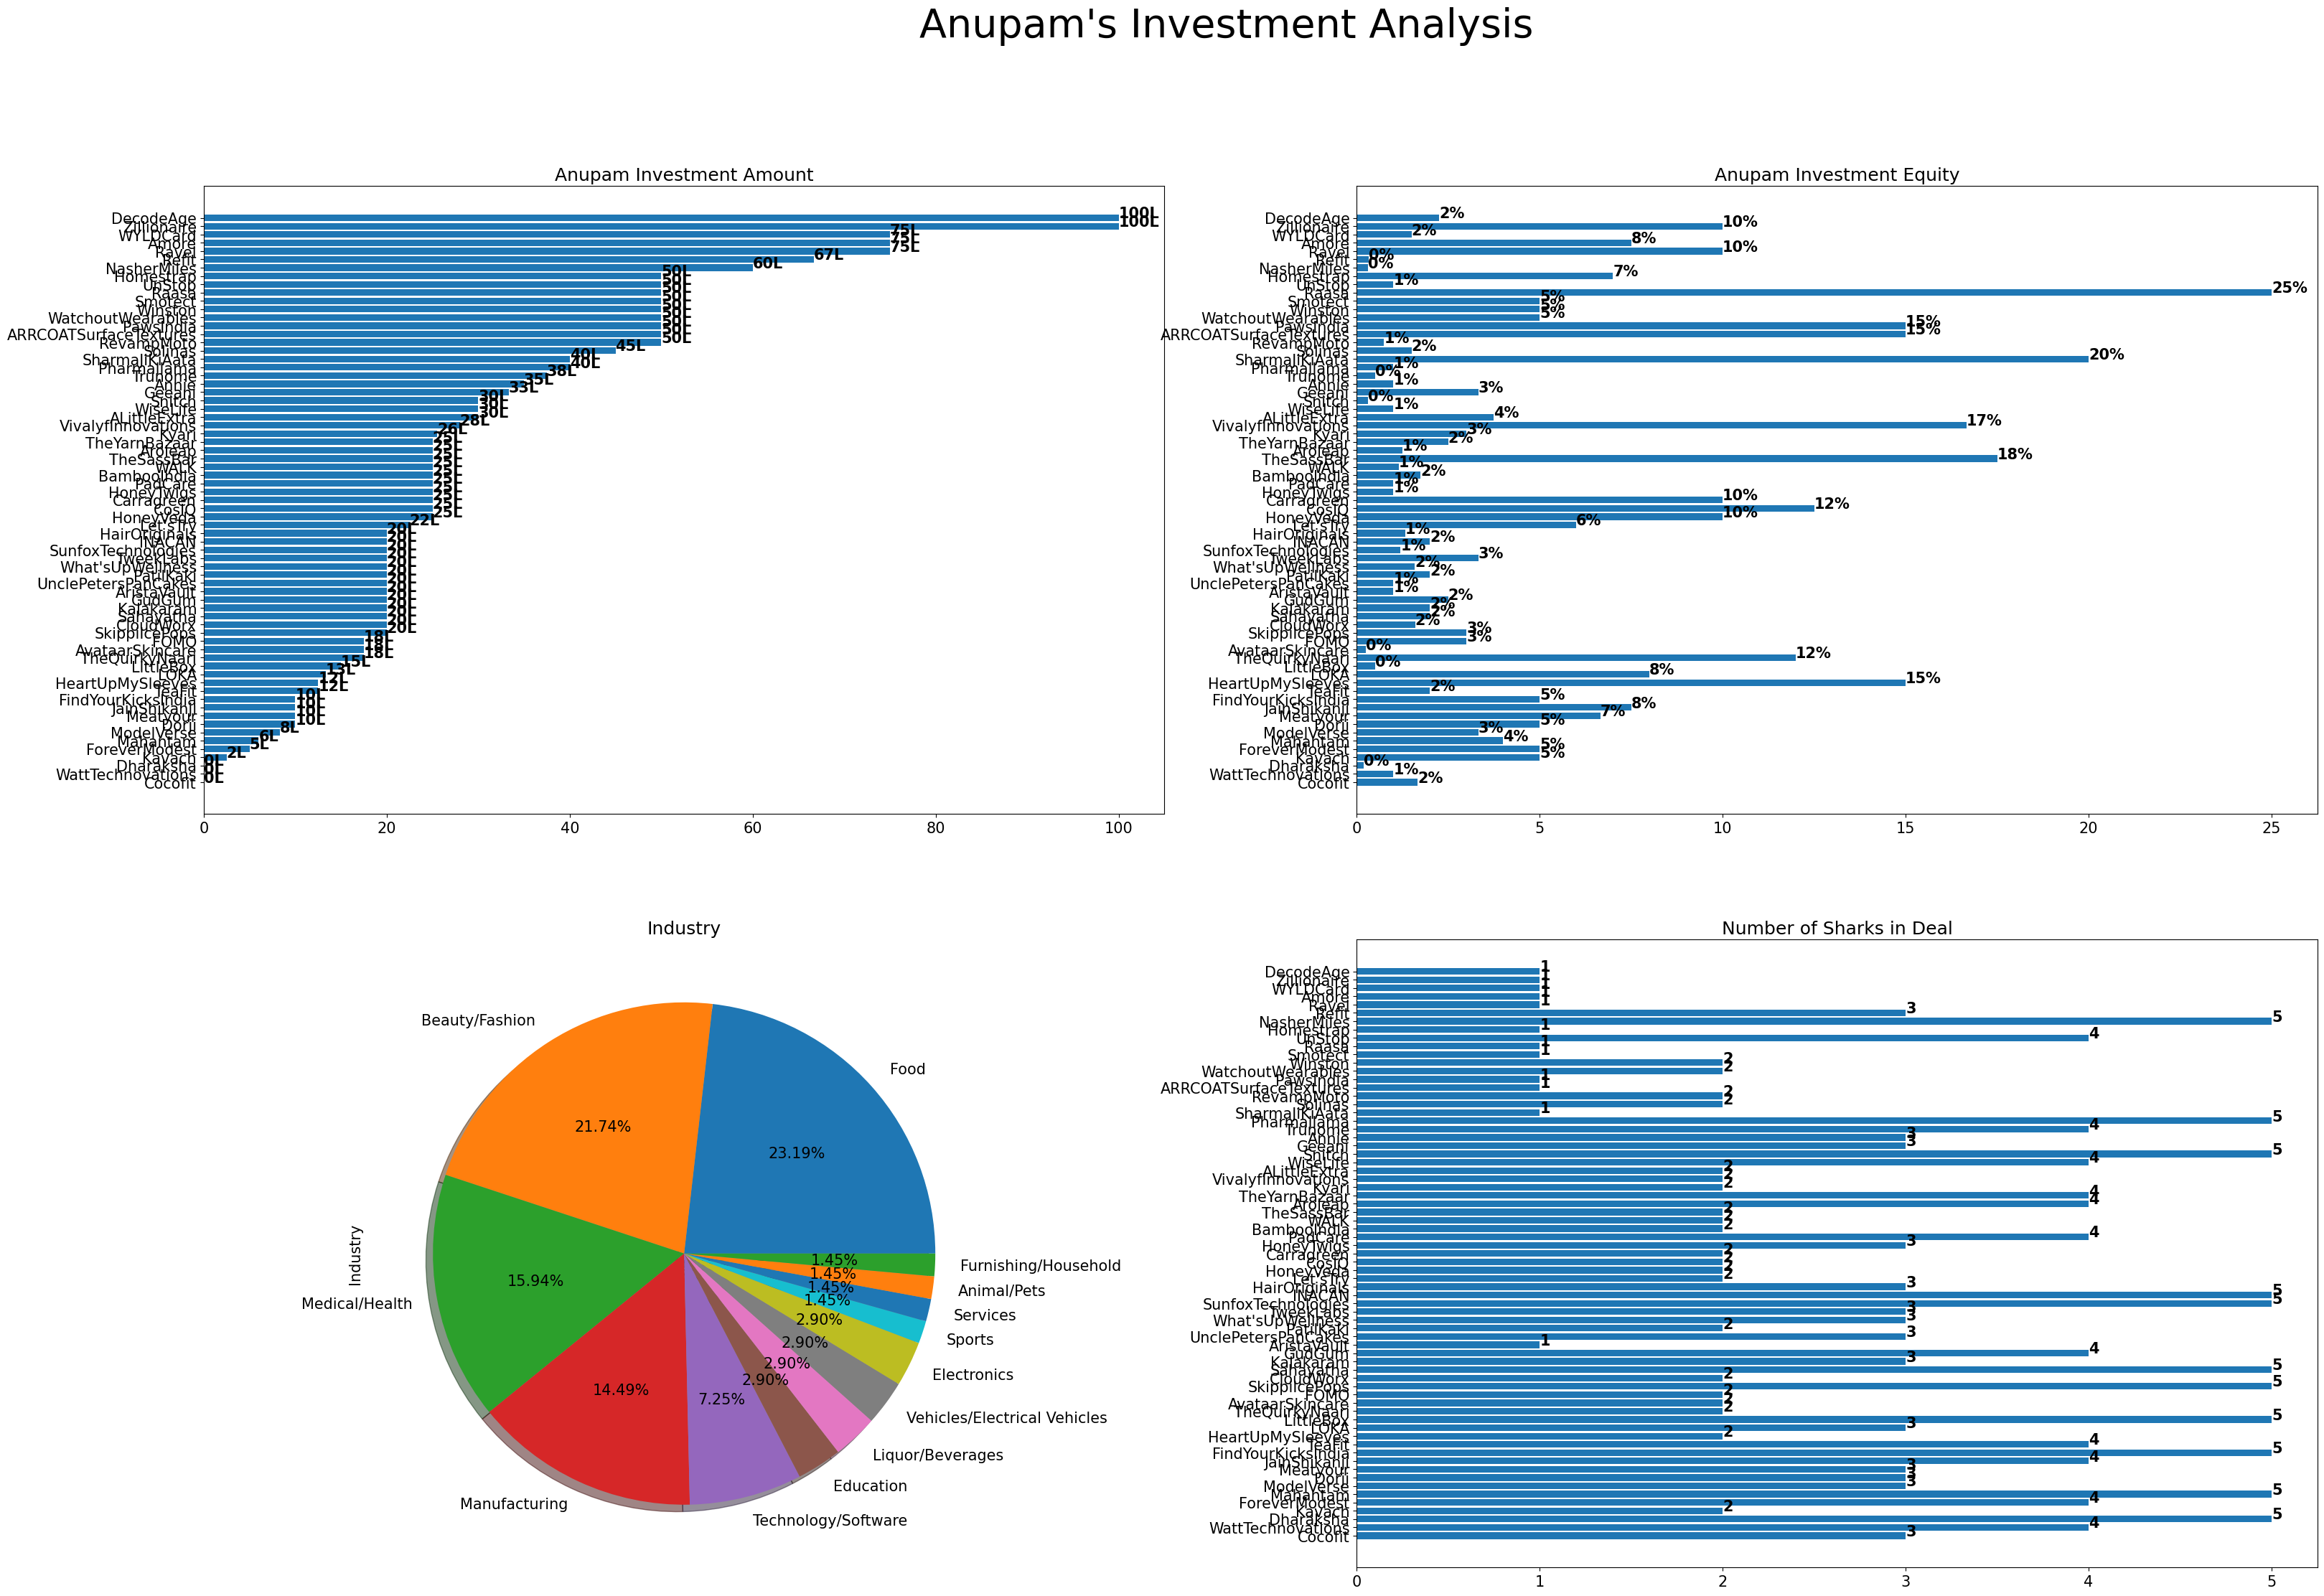

In [58]:
Anupam = Anupam_amount.sort_values('Anupam Investment Amount')
plt.rcParams.update({'font.size': 15})

plt.figure(figsize=(38,25))
plt.subplot(2,2,1)
plt.barh(Anupam["Startup Name"],Anupam["Anupam Investment Amount"])
for i, v in enumerate(Anupam["Anupam Investment Amount"]):
    plt.text(v, i , str(round(v))+"L", color='black', fontweight='bold')
plt.title("Anupam Investment Amount")
plt.subplot(2,2,2)
plt.barh(Anupam["Startup Name"],Anupam["Anupam Investment Equity"])
for i, v in enumerate(Anupam["Anupam Investment Equity"]):
    plt.text(v, i , str(round(v))+"%", color='black', fontweight='bold')
plt.title("Anupam Investment Equity")
plt.subplot(2,2,3)
Anupam["Industry"].value_counts().plot(kind='pie',autopct='%.2f%%',shadow=True)
plt.title("Industry")
plt.subplot(2,2,4)
plt.barh(Anupam["Startup Name"],Anupam["Number of Sharks in Deal"])
for i, v in enumerate(Anupam["Number of Sharks in Deal"]):
    plt.text(v, i , str(round(v)), color='black', fontweight='bold')
plt.title("Number of Sharks in Deal")
plt.suptitle("Anupam's Investment Analysis",fontsize=40)


<a id="vineeta"></a> <br>
# 11. Vineeta's Investment Analysis

Text(0.5, 0.98, "Vineeta's Investment Analysis")

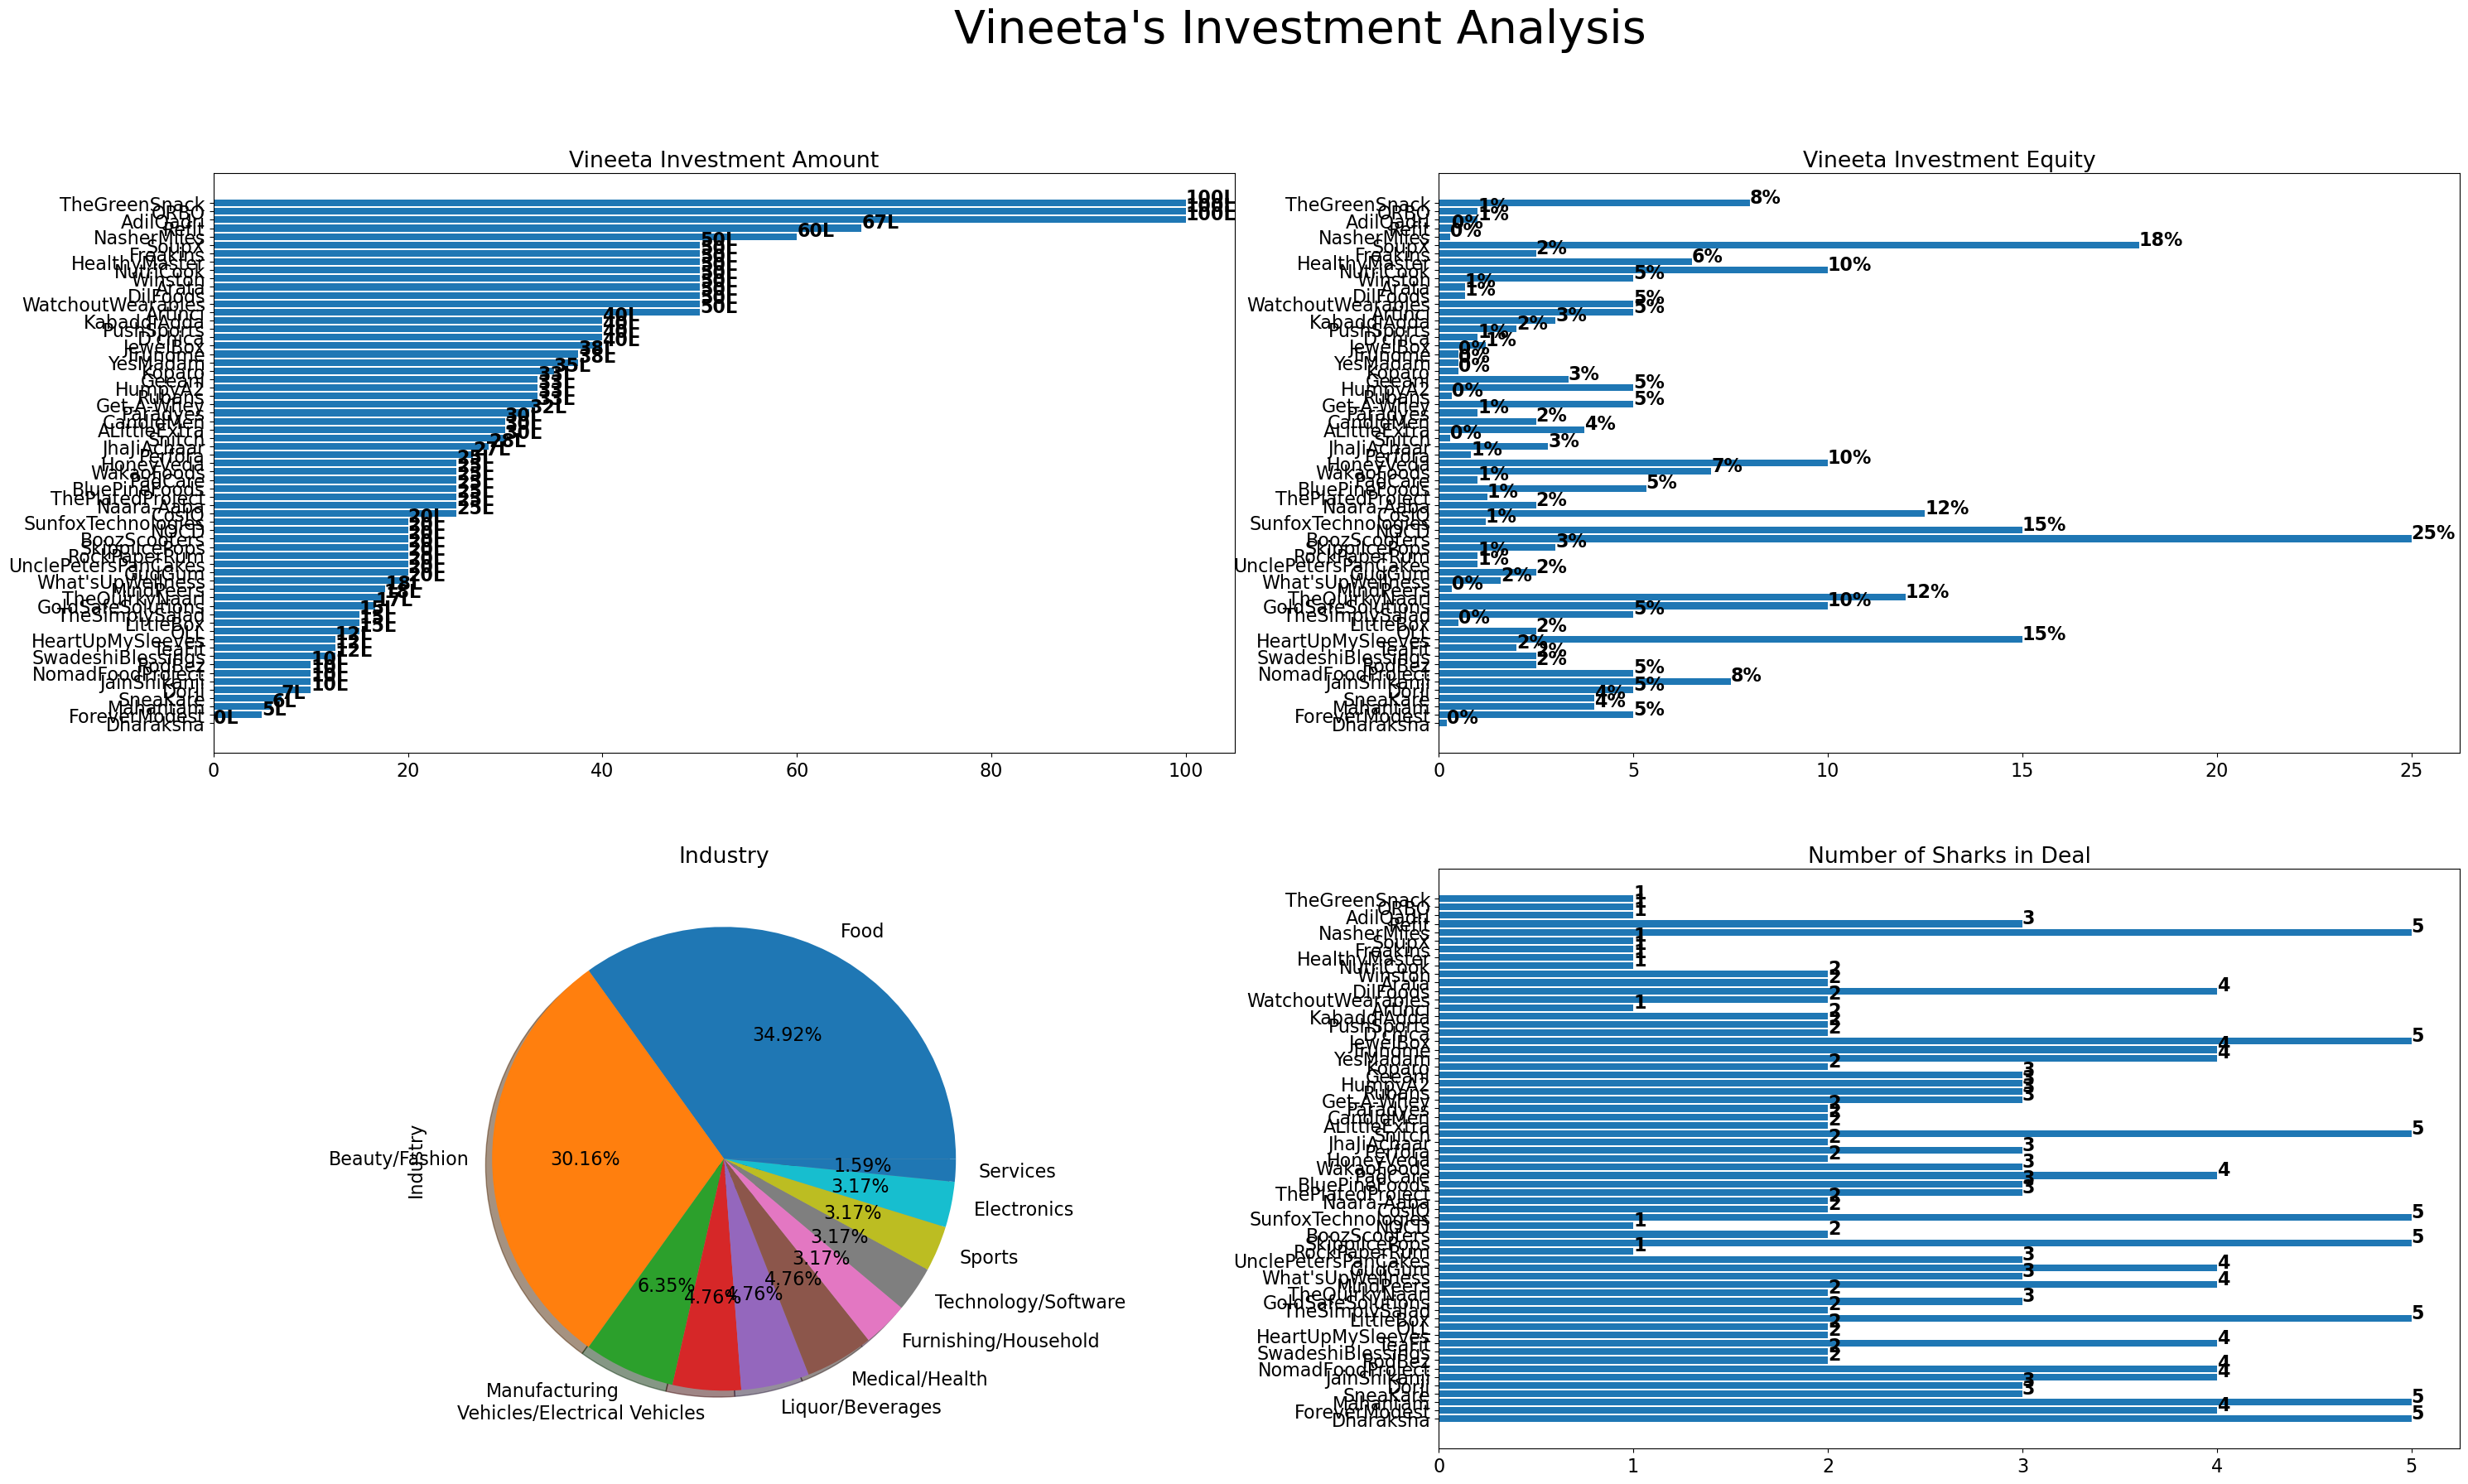

In [59]:
Vineeta = Vineeta_amount.sort_values('Vineeta Investment Amount')
plt.rcParams.update({'font.size': 16})

plt.figure(figsize=(35,20))
plt.subplot(2,2,1)
plt.barh(Vineeta["Startup Name"],Vineeta["Vineeta Investment Amount"])
for i, v in enumerate(Vineeta["Vineeta Investment Amount"]):
    plt.text(v, i , str(round(v))+"L", color='black', fontweight='bold')
plt.title("Vineeta Investment Amount")
plt.subplot(2,2,2)
plt.barh(Vineeta["Startup Name"],Vineeta["Vineeta Investment Equity"])
for i, v in enumerate(Vineeta["Vineeta Investment Equity"]):
    plt.text(v, i , str(round(v))+"%", color='black', fontweight='bold')
plt.title("Vineeta Investment Equity")
plt.subplot(2,2,3)
Vineeta["Industry"].value_counts().plot(kind='pie',autopct='%.2f%%',shadow=True)
plt.title("Industry")
plt.subplot(2,2,4)
plt.barh(Vineeta["Startup Name"],Vineeta["Number of Sharks in Deal"])
for i, v in enumerate(Vineeta["Number of Sharks in Deal"]):
    plt.text(v, i , str(round(v)), color='black', fontweight='bold')
plt.title("Number of Sharks in Deal")
plt.suptitle("Vineeta's Investment Analysis",fontsize=40)


<a id="aman"></a> <br>
# 12. Aman's Investment Analysis

Text(0.5, 0.98, "Aman's Investment Analysis")

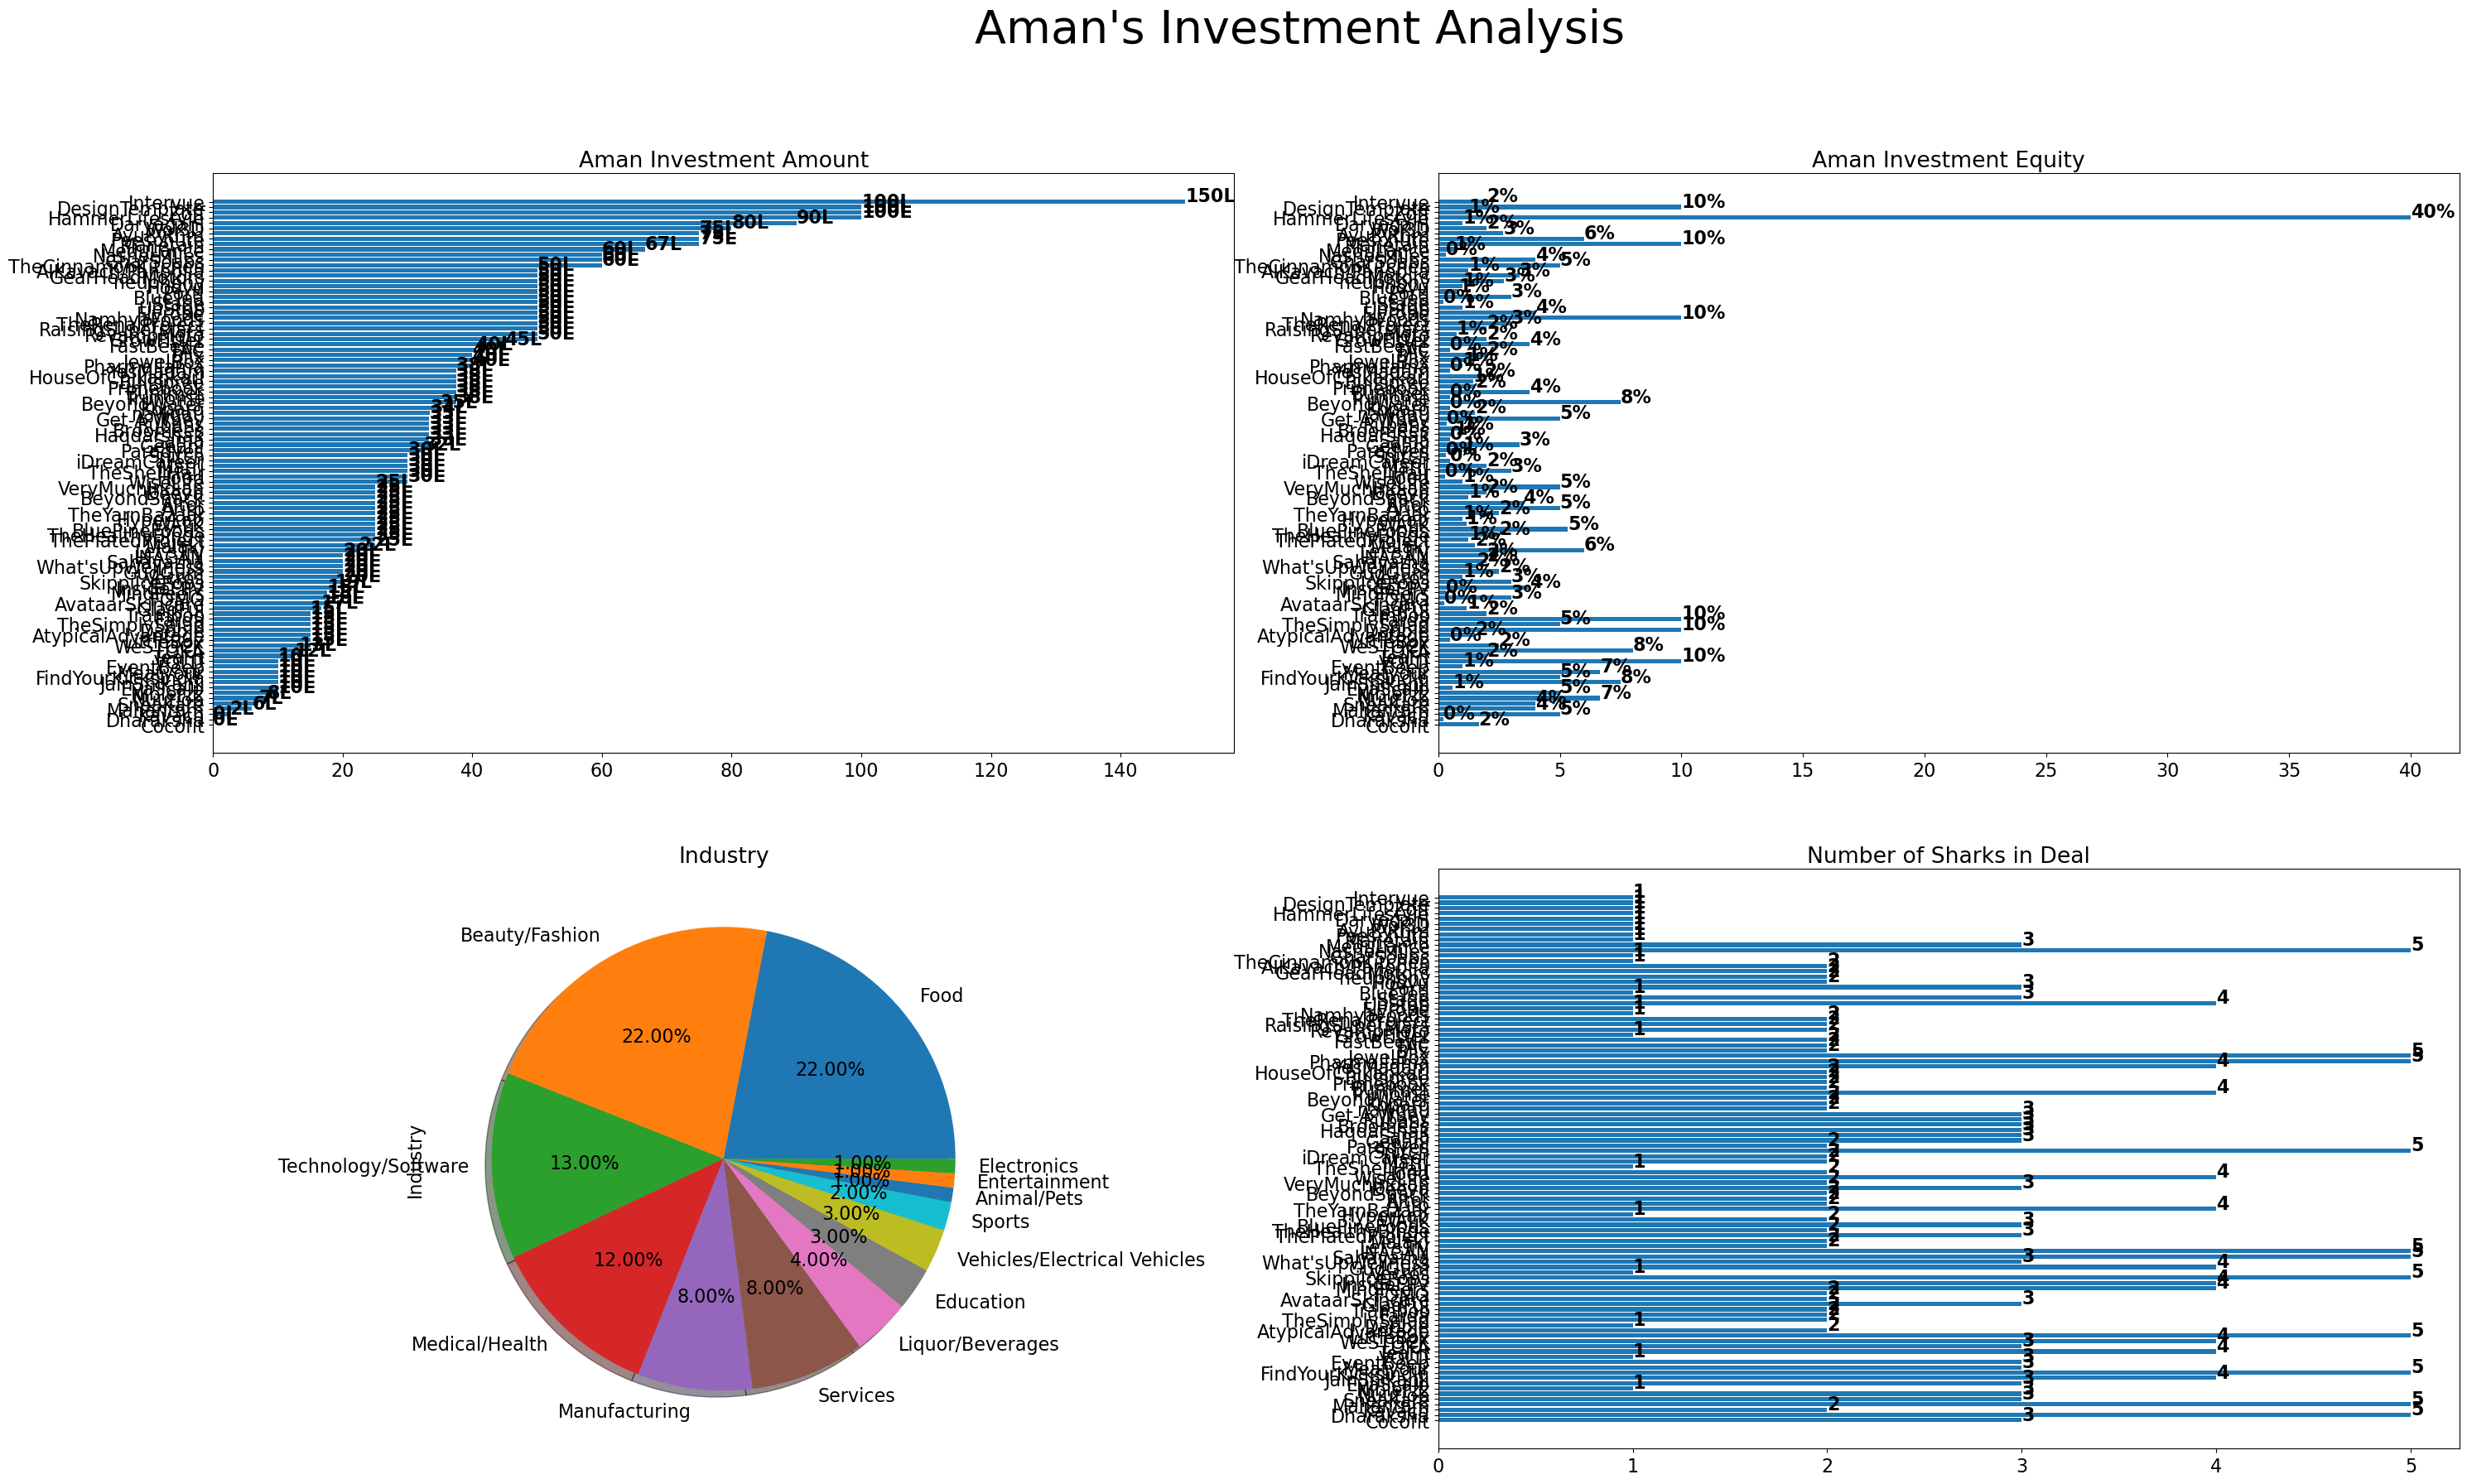

In [60]:
Aman = Aman_amount.sort_values('Aman Investment Amount')
plt.rcParams.update({'font.size': 16})

plt.figure(figsize=(35,20))
plt.subplot(2,2,1)
plt.barh(Aman["Startup Name"],Aman["Aman Investment Amount"])
for i, v in enumerate(Aman["Aman Investment Amount"]):
    plt.text(v, i , str(round(v))+"L", color='black', fontweight='bold')
plt.title("Aman Investment Amount")
plt.subplot(2,2,2)
plt.barh(Aman["Startup Name"],Aman["Aman Investment Equity"])
for i, v in enumerate(Aman["Aman Investment Equity"]):
    plt.text(v, i , str(round(v))+"%", color='black', fontweight='bold')
plt.title("Aman Investment Equity")
plt.subplot(2,2,3)
Aman["Industry"].value_counts().plot(kind='pie',autopct='%.2f%%',shadow=True)
plt.title("Industry")
plt.subplot(2,2,4)
plt.barh(Aman["Startup Name"],Aman["Number of Sharks in Deal"])
for i, v in enumerate(Aman["Number of Sharks in Deal"]):
    plt.text(v, i , str(round(v)), color='black', fontweight='bold')
plt.title("Number of Sharks in Deal")
plt.suptitle("Aman's Investment Analysis",fontsize=40)


<a id="peyush"></a> <br>
# 13. Peyush's Investment Analysis

Text(0.5, 0.98, "Peyush's Investment Analysis")

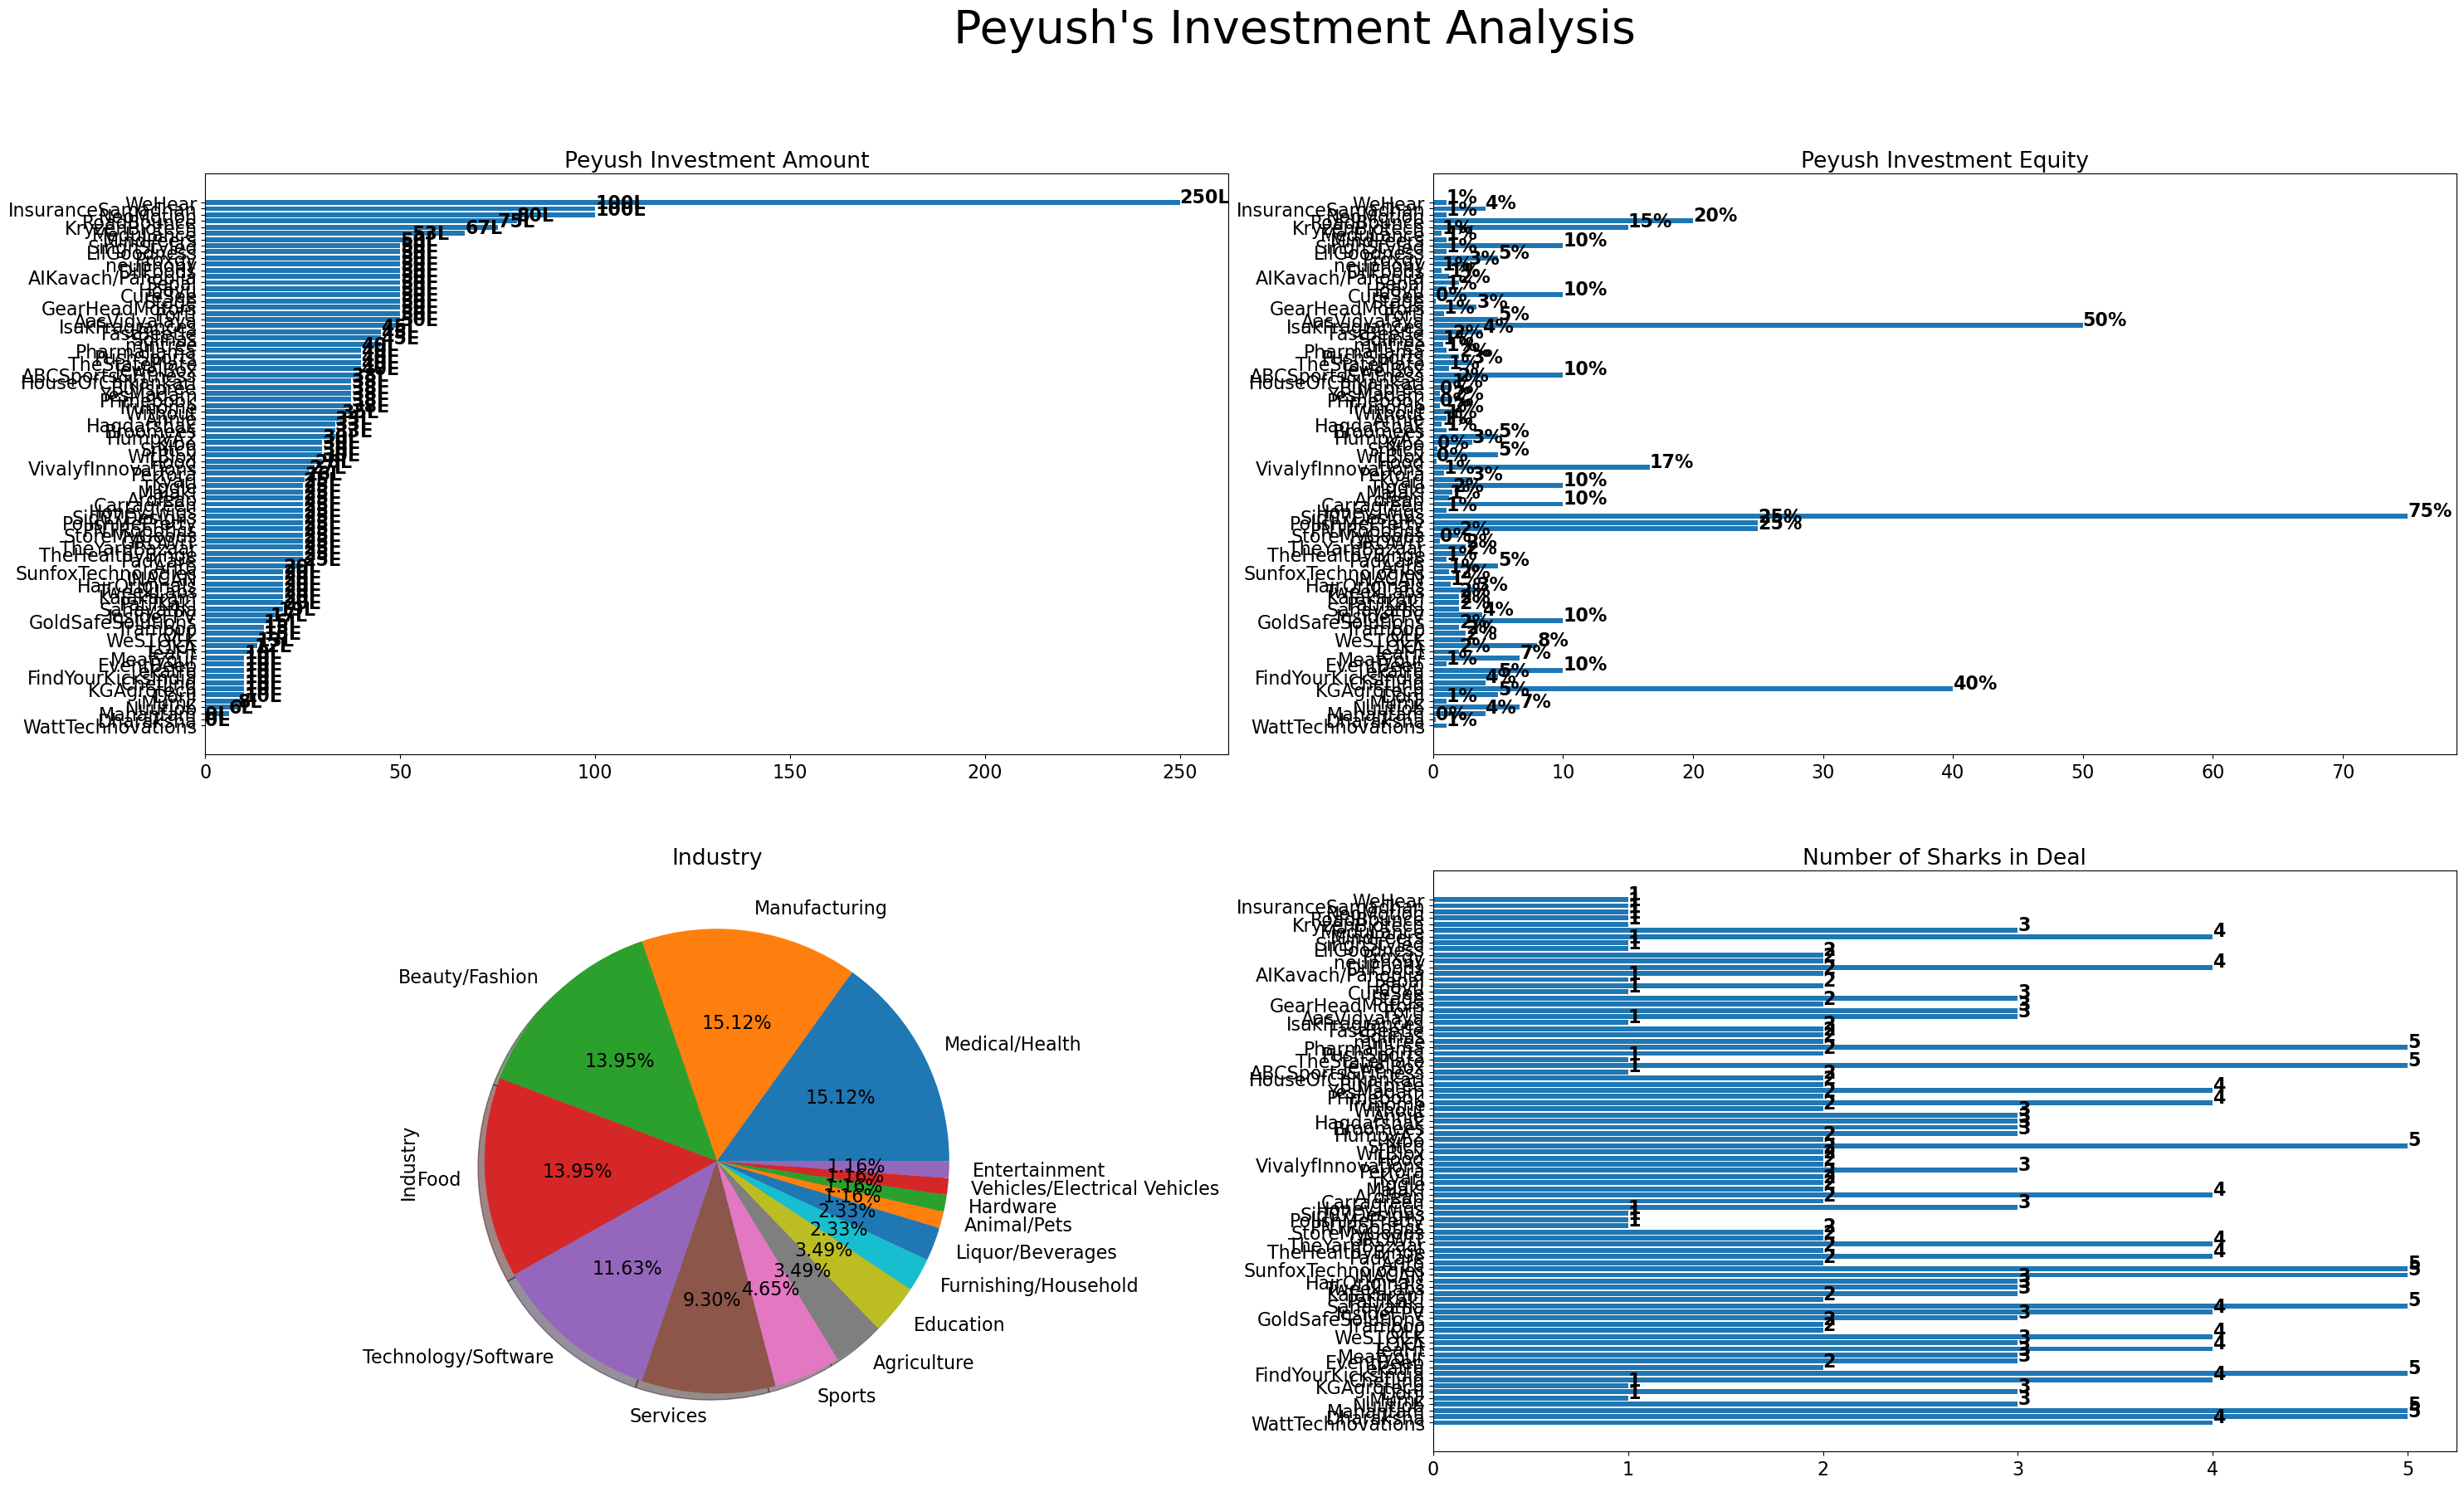

In [61]:
Peyush = Peyush_amount.sort_values('Peyush Investment Amount')
plt.rcParams.update({'font.size': 16})

plt.figure(figsize=(35,20))
plt.subplot(2,2,1)
plt.barh(Peyush["Startup Name"],Peyush["Peyush Investment Amount"])
for i, v in enumerate(Peyush["Peyush Investment Amount"]):
    plt.text(v, i , str(round(v))+"L", color='black', fontweight='bold')
plt.title("Peyush Investment Amount")
plt.subplot(2,2,2)
plt.barh(Peyush["Startup Name"],Peyush["Peyush Investment Equity"])
for i, v in enumerate(Peyush["Peyush Investment Equity"]):
    plt.text(v, i , str(round(v))+"%", color='black', fontweight='bold')
plt.title("Peyush Investment Equity")
plt.subplot(2,2,3)
Peyush["Industry"].value_counts().plot(kind='pie',autopct='%.2f%%',shadow=True)
plt.title("Industry")
plt.subplot(2,2,4)
plt.barh(Peyush["Startup Name"],Peyush["Number of Sharks in Deal"])
for i, v in enumerate(Peyush["Number of Sharks in Deal"]):
    plt.text(v, i , str(round(v)), color='black', fontweight='bold')
plt.title("Number of Sharks in Deal")
plt.suptitle("Peyush's Investment Analysis",fontsize=40)


### Thank You